## Imports and loading data

In [19]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and observing dataset

In [20]:
df= pd.read_csv("D:/C1- INTL/app_data_assignment.csv")

In [21]:
prevdf= pd.read_csv("D:/C1- INTL/p_app_assignment.csv")

### Handling rows and columns & Observing data

 #### As there are 122 columns, we will be grouping the data for ease of calculation and understanding.
 First we need to analyse target variable which is "TARGET" .  clients with payment difficulties are indicated with 1 and all other cases with 0. We will check if the data is imbalanced. From the below calculation it shows that DATA is higly imbalaced.

In [22]:
target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]
percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)
percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)
print('Count of target0_df:', len(target0_df))
print('Count of target1_df:', len(target1_df))
print('Percentage of people who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', percentage_defaulters, '%' )
imb_ratio = round(len(target0_df)/len(target1_df),2)
print('Imbalance Ratio:', imb_ratio)

Count of target0_df: 282686
Count of target1_df: 24825
Percentage of people who paid their loan are:  91.93 %
Percentage of people who did not paid their loan are:  8.07 %
Imbalance Ratio: 11.39


### Missing values 
<div class="alert-info"> Now we will check for missing data and its % in dataframe and will deal with it.<br>
 1) if the missing data value is more than 50% we will drop that column<br>
 2) if the missing data is less than 20% we will treat the same.

In [23]:
Missingvaluedf=df.isna().mean().round(4) * 100
Missingvaluedf

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [24]:
Missingvaluedf50 = Missingvaluedf[Missingvaluedf>50]
print("Number of columns having null value more than 50% :", len(Missingvaluedf50.index))
Missingvaluedf50.sort_values(ascending=False).head()

Number of columns having null value more than 50% : 41


COMMONAREA_AVG              69.87
COMMONAREA_MEDI             69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
dtype: float64

In [25]:
Missingvaluedf20 = Missingvaluedf[Missingvaluedf<20]
print("Number of columns having null value less than 20% :", len(Missingvaluedf20.index))
Missingvaluedf20.sort_values(ascending=False).head()

Number of columns having null value less than 20% : 72


EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
dtype: float64

<div class="alert-danger"> As per above calculation columns  COMMONAREA_MODE   untill EMERGENCYSTATE_MODE  are having more than 50% missing values and the data is not relevant to make decision hence we will drop these columns.

In [26]:
df.drop(df.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns, axis = 1,inplace=True)

### Housing Data
 Most of the Home related data like floor etc has been dropped as it  had more than 50% missing value. Only we will analyse if housing type has any correlation with target variable.
 - <div class="alert-success"> The data shows majorly the of the people who have got there own house / apt have less likelyhood of default.

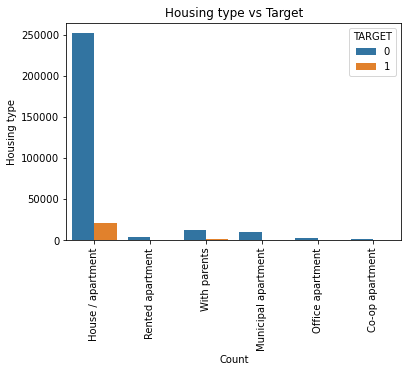

In [29]:
fig = plt.figure(20*20)
plt.title("Housing type vs Target")
sns.countplot(df['NAME_HOUSING_TYPE'],hue=df["TARGET"])
plt.xlabel("Count")
plt.xticks(rotation=90)
plt.ylabel("Housing type")
plt.show()

Now defining a function to find valuewise defaulter percentage.

In [30]:
def valuewise_defaulter_percentage(df,col):
    new_df =pd.DataFrame(columns=["Value","Percentage of Defaulter"])
    for value in df[col].unique():
        default_cnt=df[(df[col]==value) &(df.TARGET==1)].shape[0]
        total_cnt=df[df[col]==value].shape[0]
        new_df=new_df.append({'Value':value,"Percentage of Defaulter":(default_cnt*100/total_cnt)},ignore_index=True)
    return new_df.sort_values(by="Percentage of Defaulter",ascending= False)

In [31]:
valuewise_defaulter_percentage(df,'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


### Client Belongings 
<div class="alert-success">People not owning car but  owning housing are less likely to default.<br>
 <div class="alert-danger"> Also car age of client will not have an impact on defauting or non defaulting hence removing that column

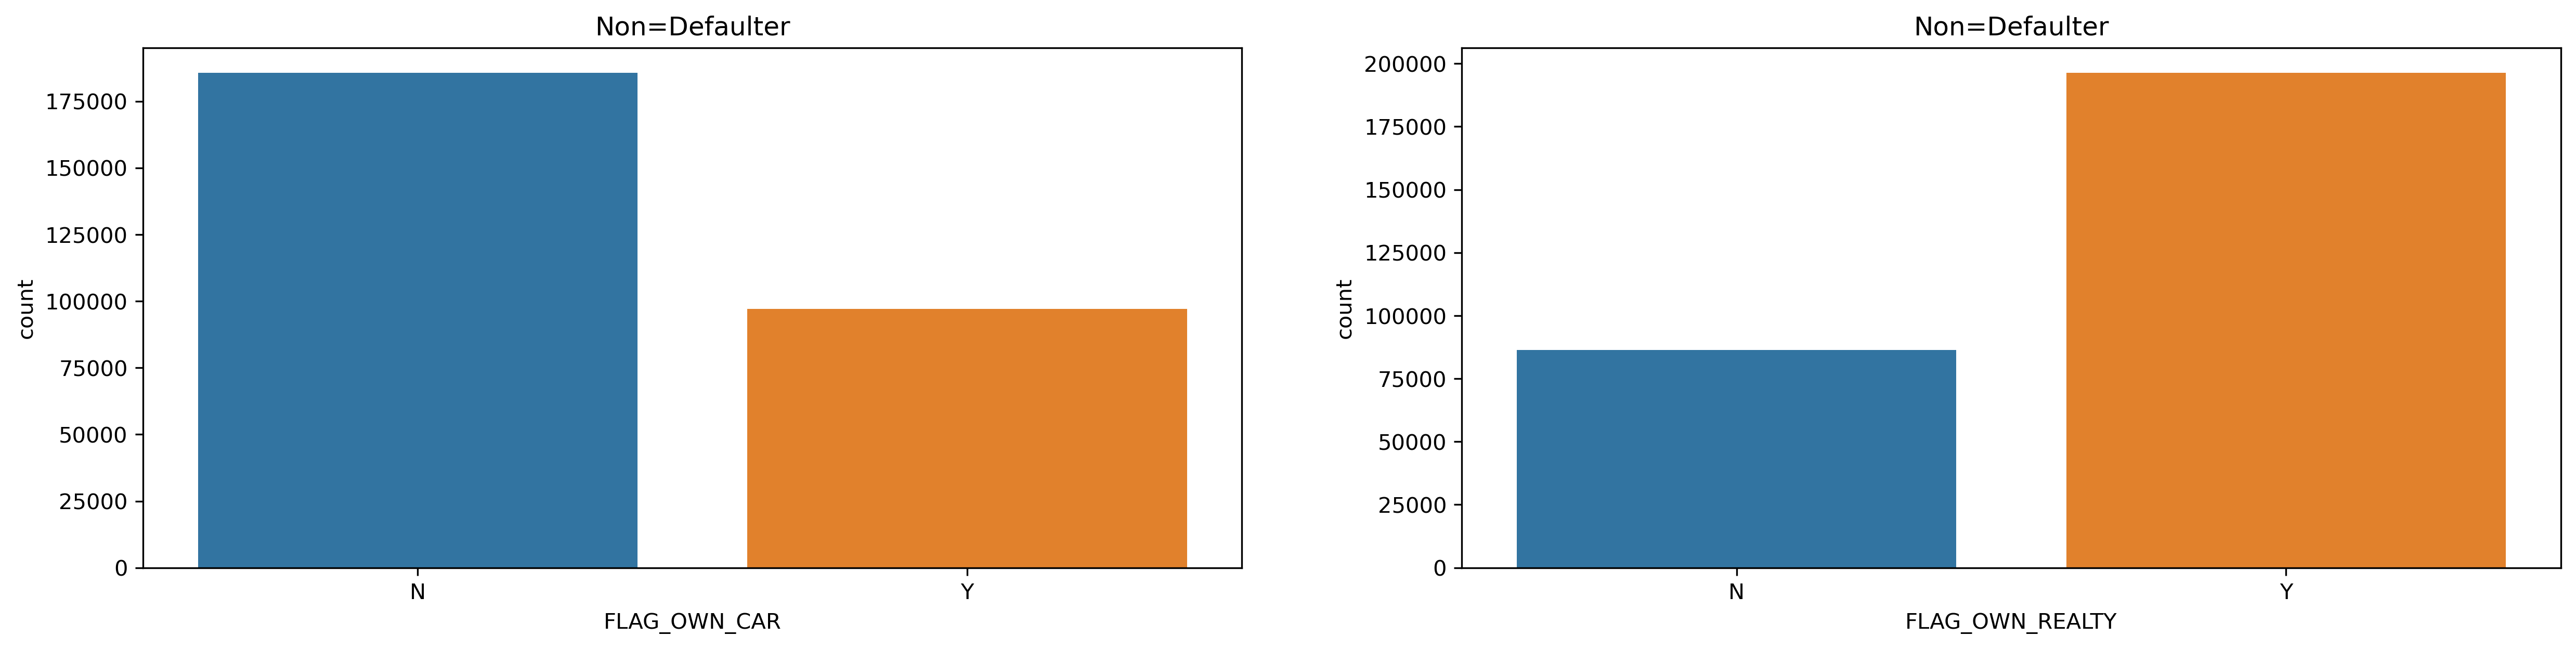

In [34]:
plt.figure(figsize = (20, 15), dpi=300)
non_default=df[df["TARGET"]==0]
default=df[df["TARGET"]==1]
for i,j in enumerate(["FLAG_OWN_CAR","FLAG_OWN_REALTY"]):
    plt.subplot(3, 2, i+1)
    sns.countplot(j,data = non_default)
    plt.title("Non=Defaulter")
plt.show()

In [35]:
valuewise_defaulter_percentage(df,'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [36]:
valuewise_defaulter_percentage(df,'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


In [33]:
df.drop(['OWN_CAR_AGE'],axis=1,inplace=True)

### Contact details

<div class="alert-danger"> Below pair plot shows there is not much correlation between contact details related data and target variable hence we will get rid of this columns.Hence dropping these columns as they are not relevant for decision making. 

<Figure size 432x288 with 0 Axes>

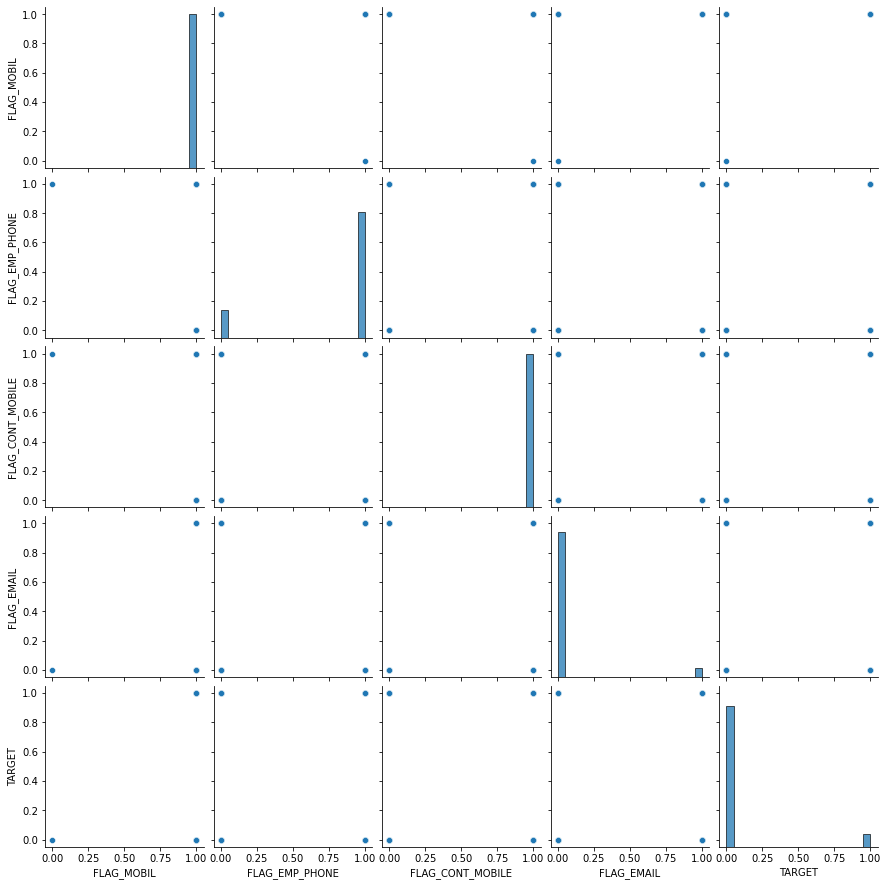

In [37]:
Starting_pt= df.columns.get_loc("FLAG_MOBIL")
Ending_pt=df.columns.get_loc("FLAG_EMAIL")
Contacts_df=df.iloc[:,Starting_pt:Ending_pt+1]
Contacts_df["TARGET"]= df["TARGET"]
fig = plt.figure(20*20)
sns.pairplot(Contacts_df[["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_CONT_MOBILE","FLAG_EMAIL","TARGET"]])
plt.show()

In [38]:
df.drop(["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_CONT_MOBILE","FLAG_EMAIL"], axis = 1,inplace=True)

# Document submitted details

<div class="alert-danger"> As per below display Only Document 3 is submitted by majority of people.Hence we will drop rest of the columns.We will see if Doc 3 has any correlation. From Valuewise default details in both the cases the distribution looks same hence it  shows that it might not have any correlation with target hence removing it.

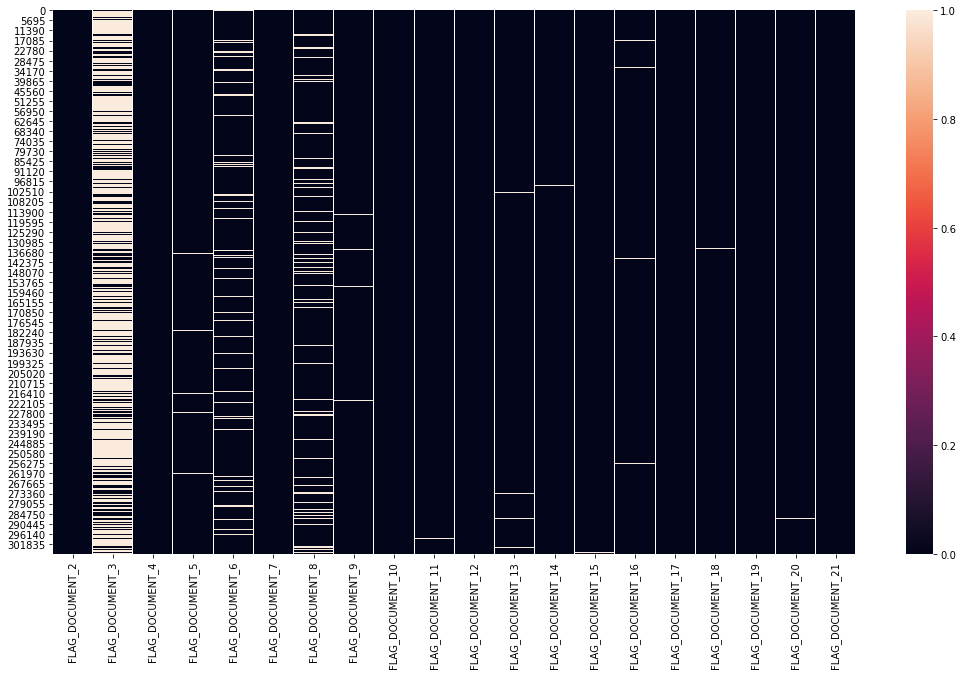

In [39]:
Starting_pt= df.columns.get_loc("FLAG_DOCUMENT_2")
Ending_pt=df.columns.get_loc("FLAG_DOCUMENT_21")+1
plt.figure(figsize=(18,10))
sns.heatmap(df.iloc[:,Starting_pt:Ending_pt])
plt.show()

In [40]:
valuewise_defaulter_percentage(df,'FLAG_DOCUMENT_3')

,Value,Percentage of Defaulter
0,1.0,8.844921
1,0.0,6.182503


In [41]:
df.drop(df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns, axis = 1,inplace=True)

### Examining columns containing social circle

In [42]:
SocialDF=df[[i for i in df.columns if "SOCIAL_CIRCLE"in i]]
SocialDF.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


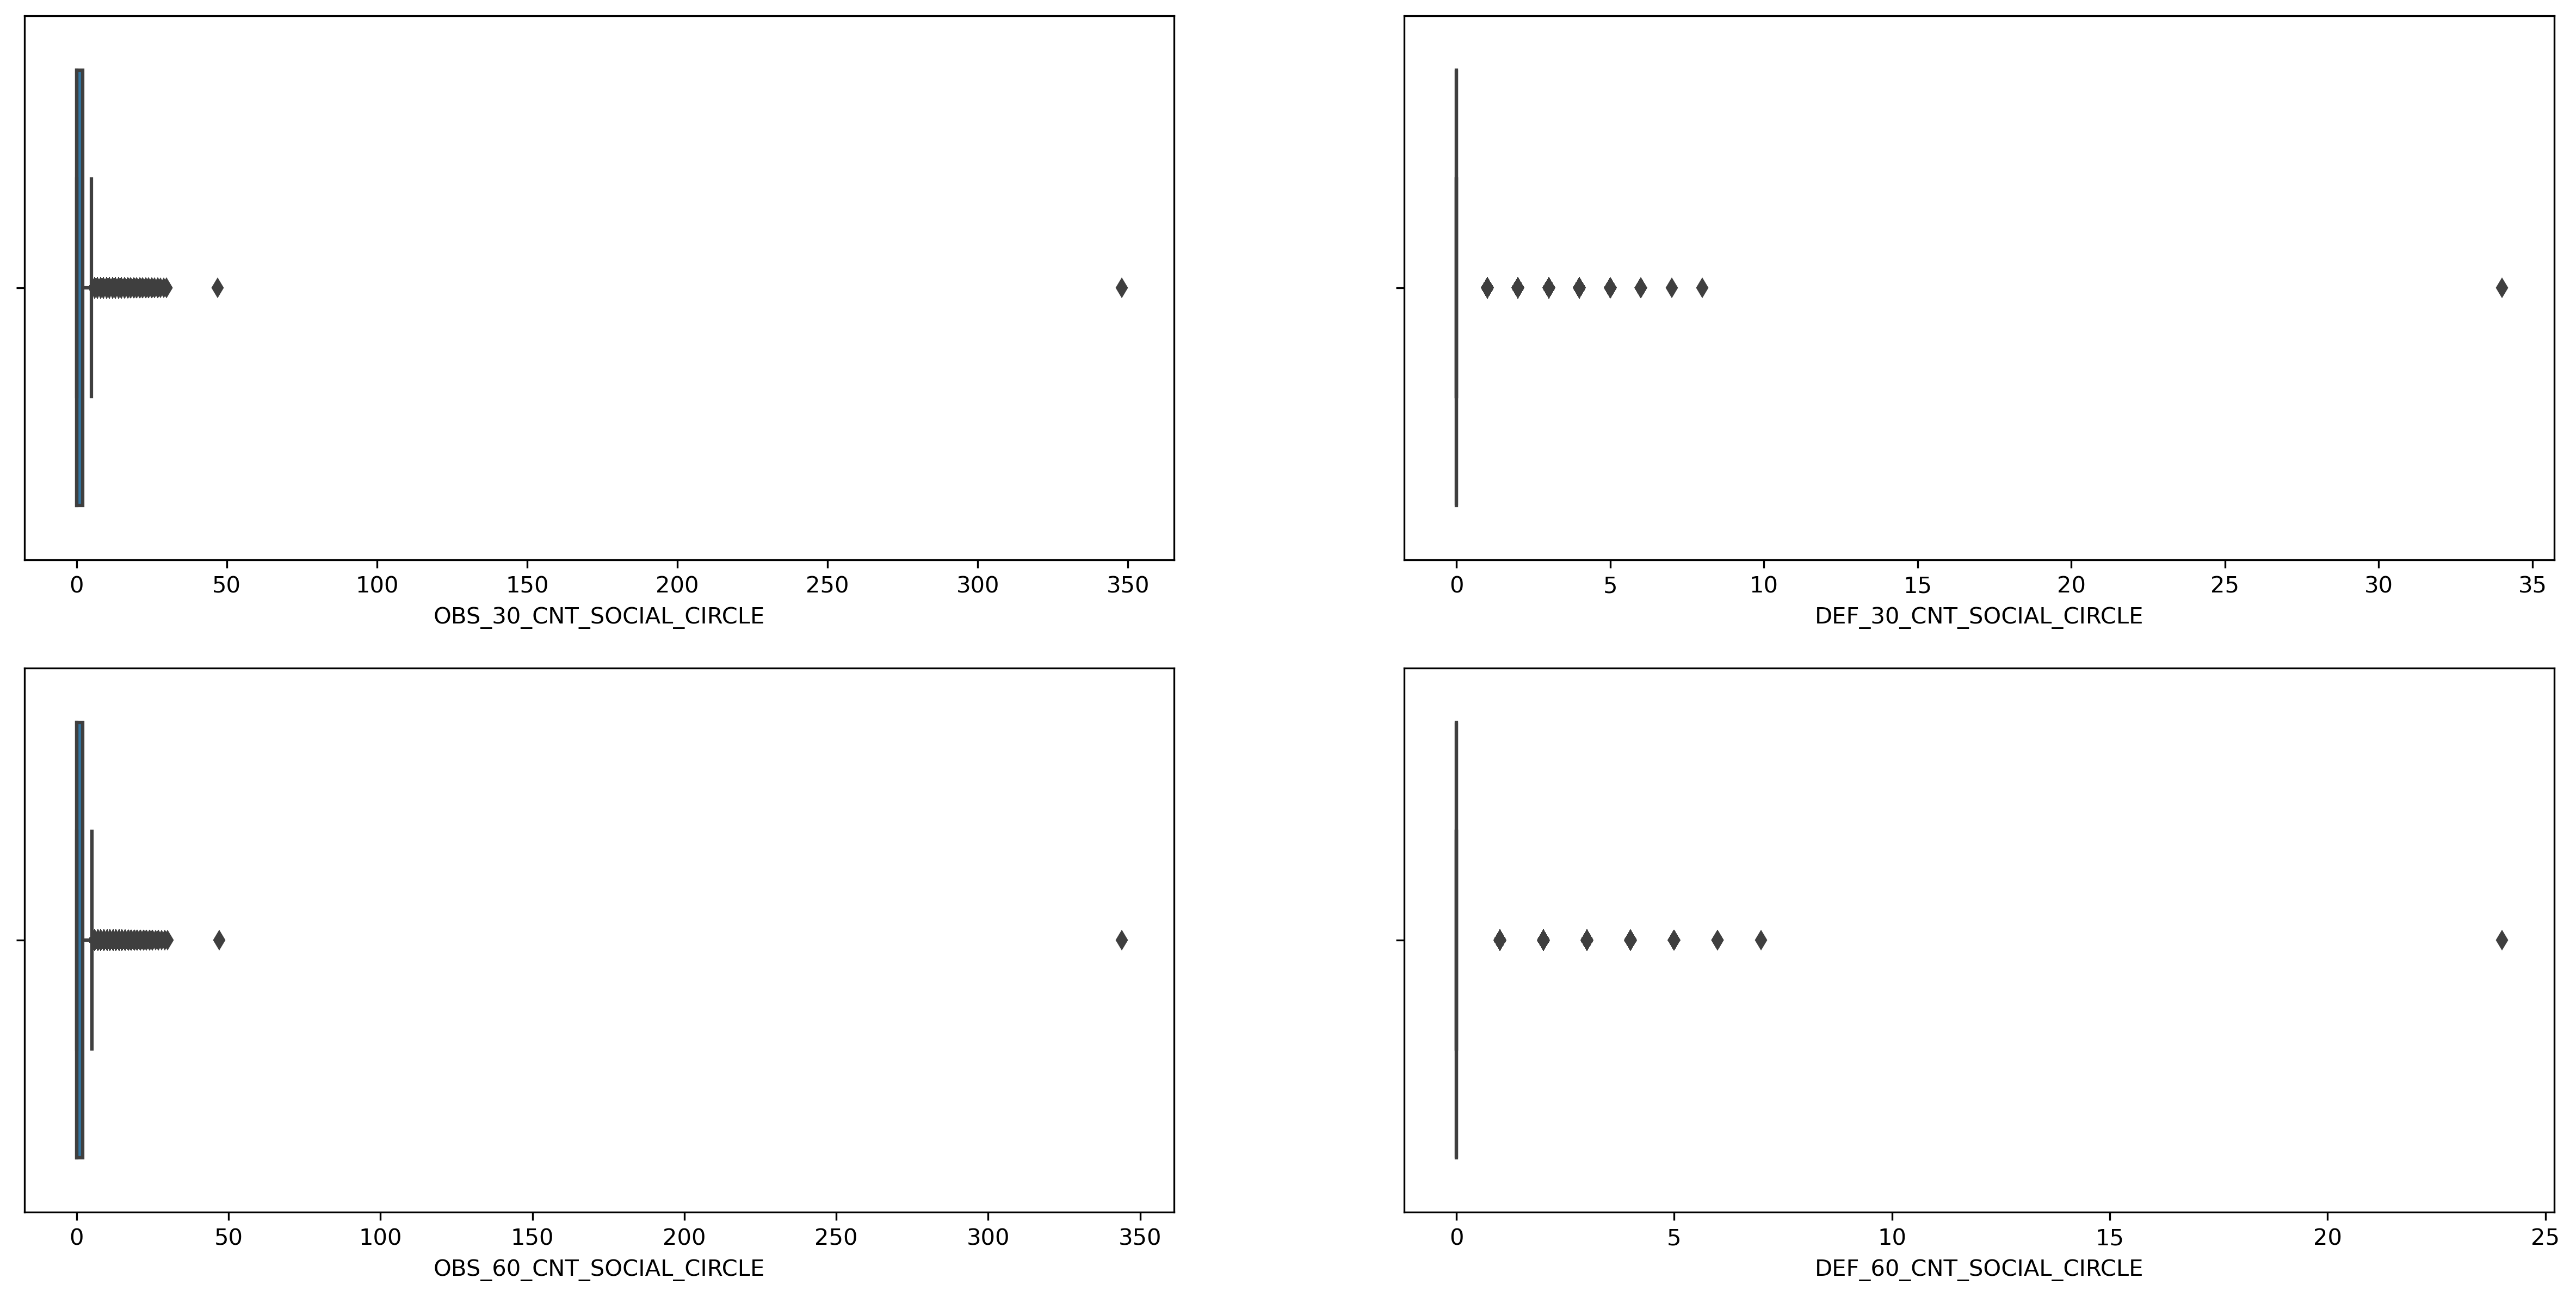

In [43]:
plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(SocialDF):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df)
plt.show()

#### Checking correlation of Social circle columns with TARGET variable

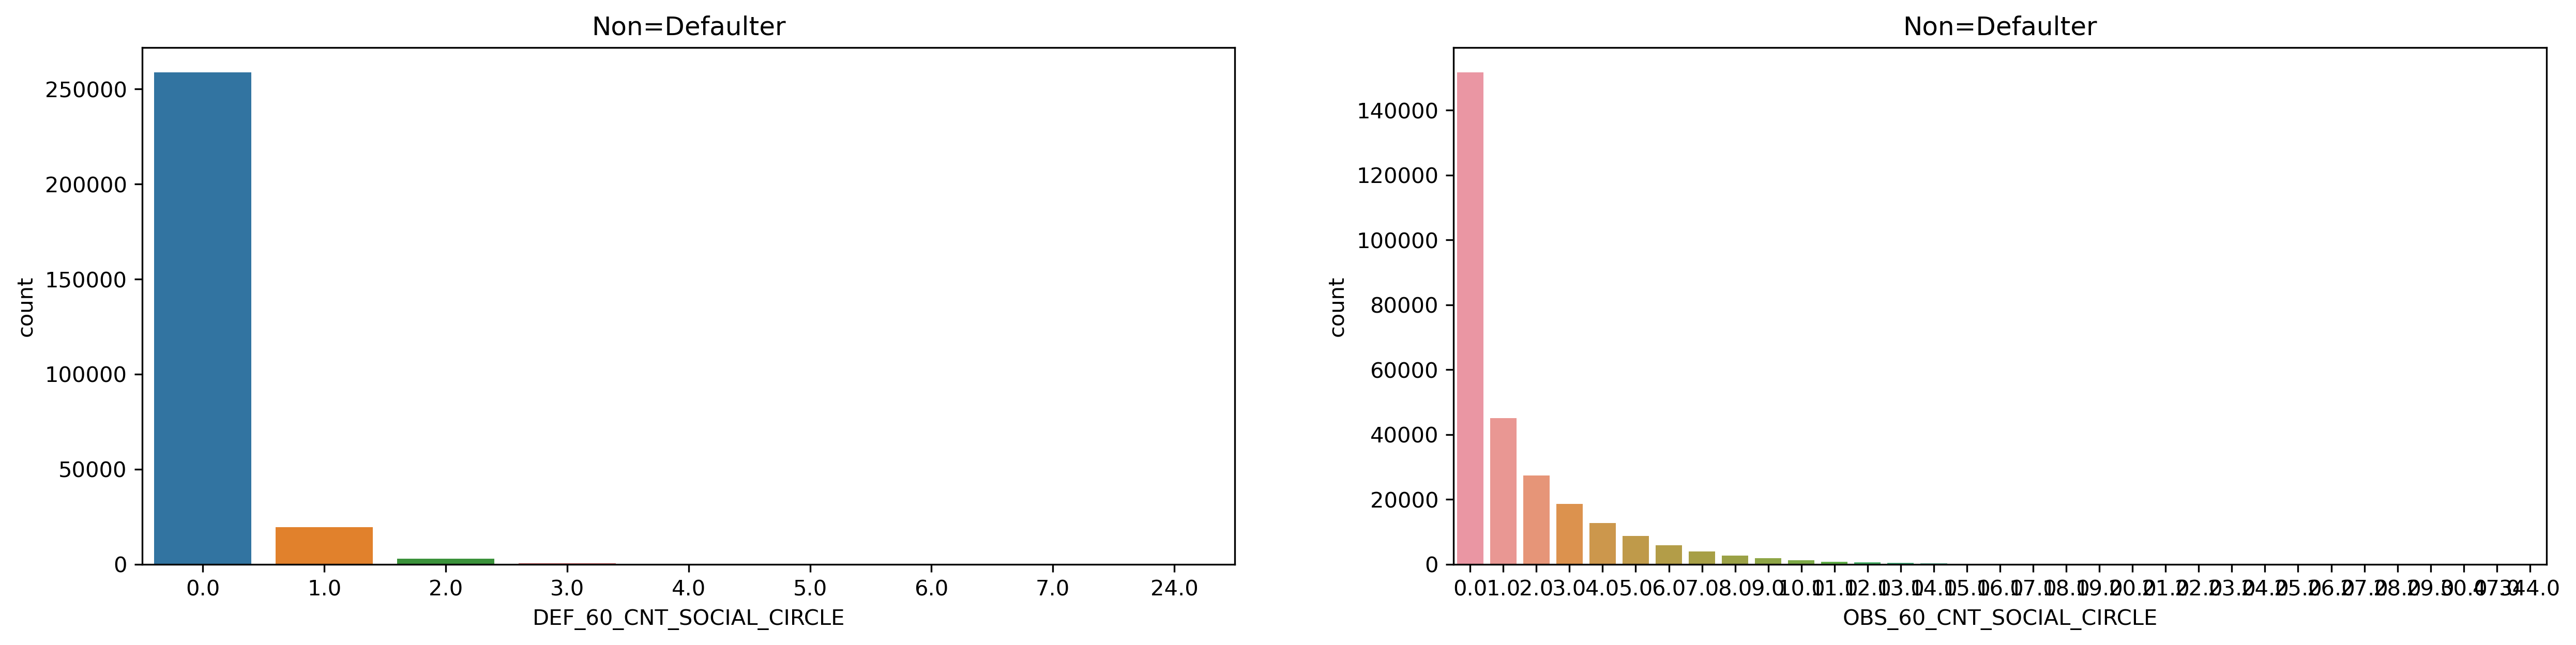

In [44]:
plt.figure(figsize = (20, 15), dpi=300)
non_default=df[df["TARGET"]==0]
default=df[df["TARGET"]==1]
for i,j in enumerate(["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]):
    plt.subplot(3, 2, i+1)
    sns.countplot(j,data = non_default)
    plt.title("Non=Defaulter")
plt.show()

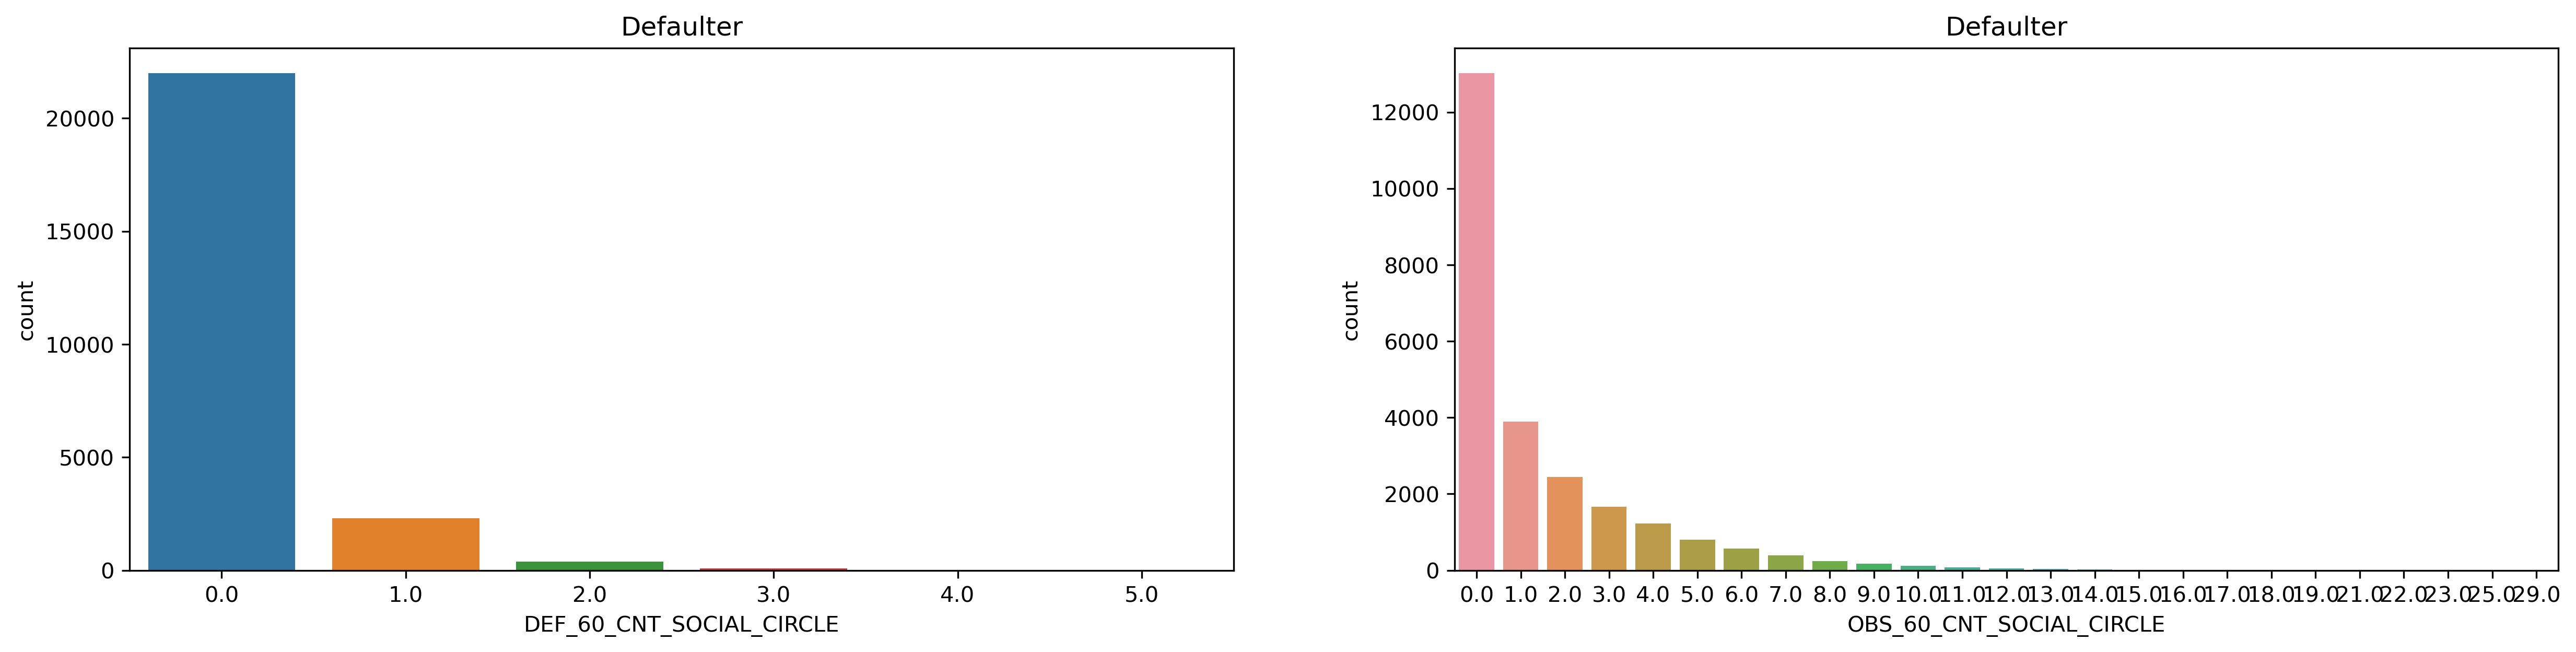

In [45]:
plt.figure(figsize = (20, 15), dpi=300)
for i,j in enumerate(["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]):
    plt.subplot(3, 2, i+1)
    sns.countplot(j,data = default)
    plt.title("Defaulter")
plt.show()

<div class="alert-success"> DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated.	OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE	are very similar columns. Now finding correlation with target variable. 
from below analysis OBS_60_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE are very identical trend for defaulters n Non defaulters.Hence they are not useful for determining defaulters.

### Analyzing Income and Loan related.

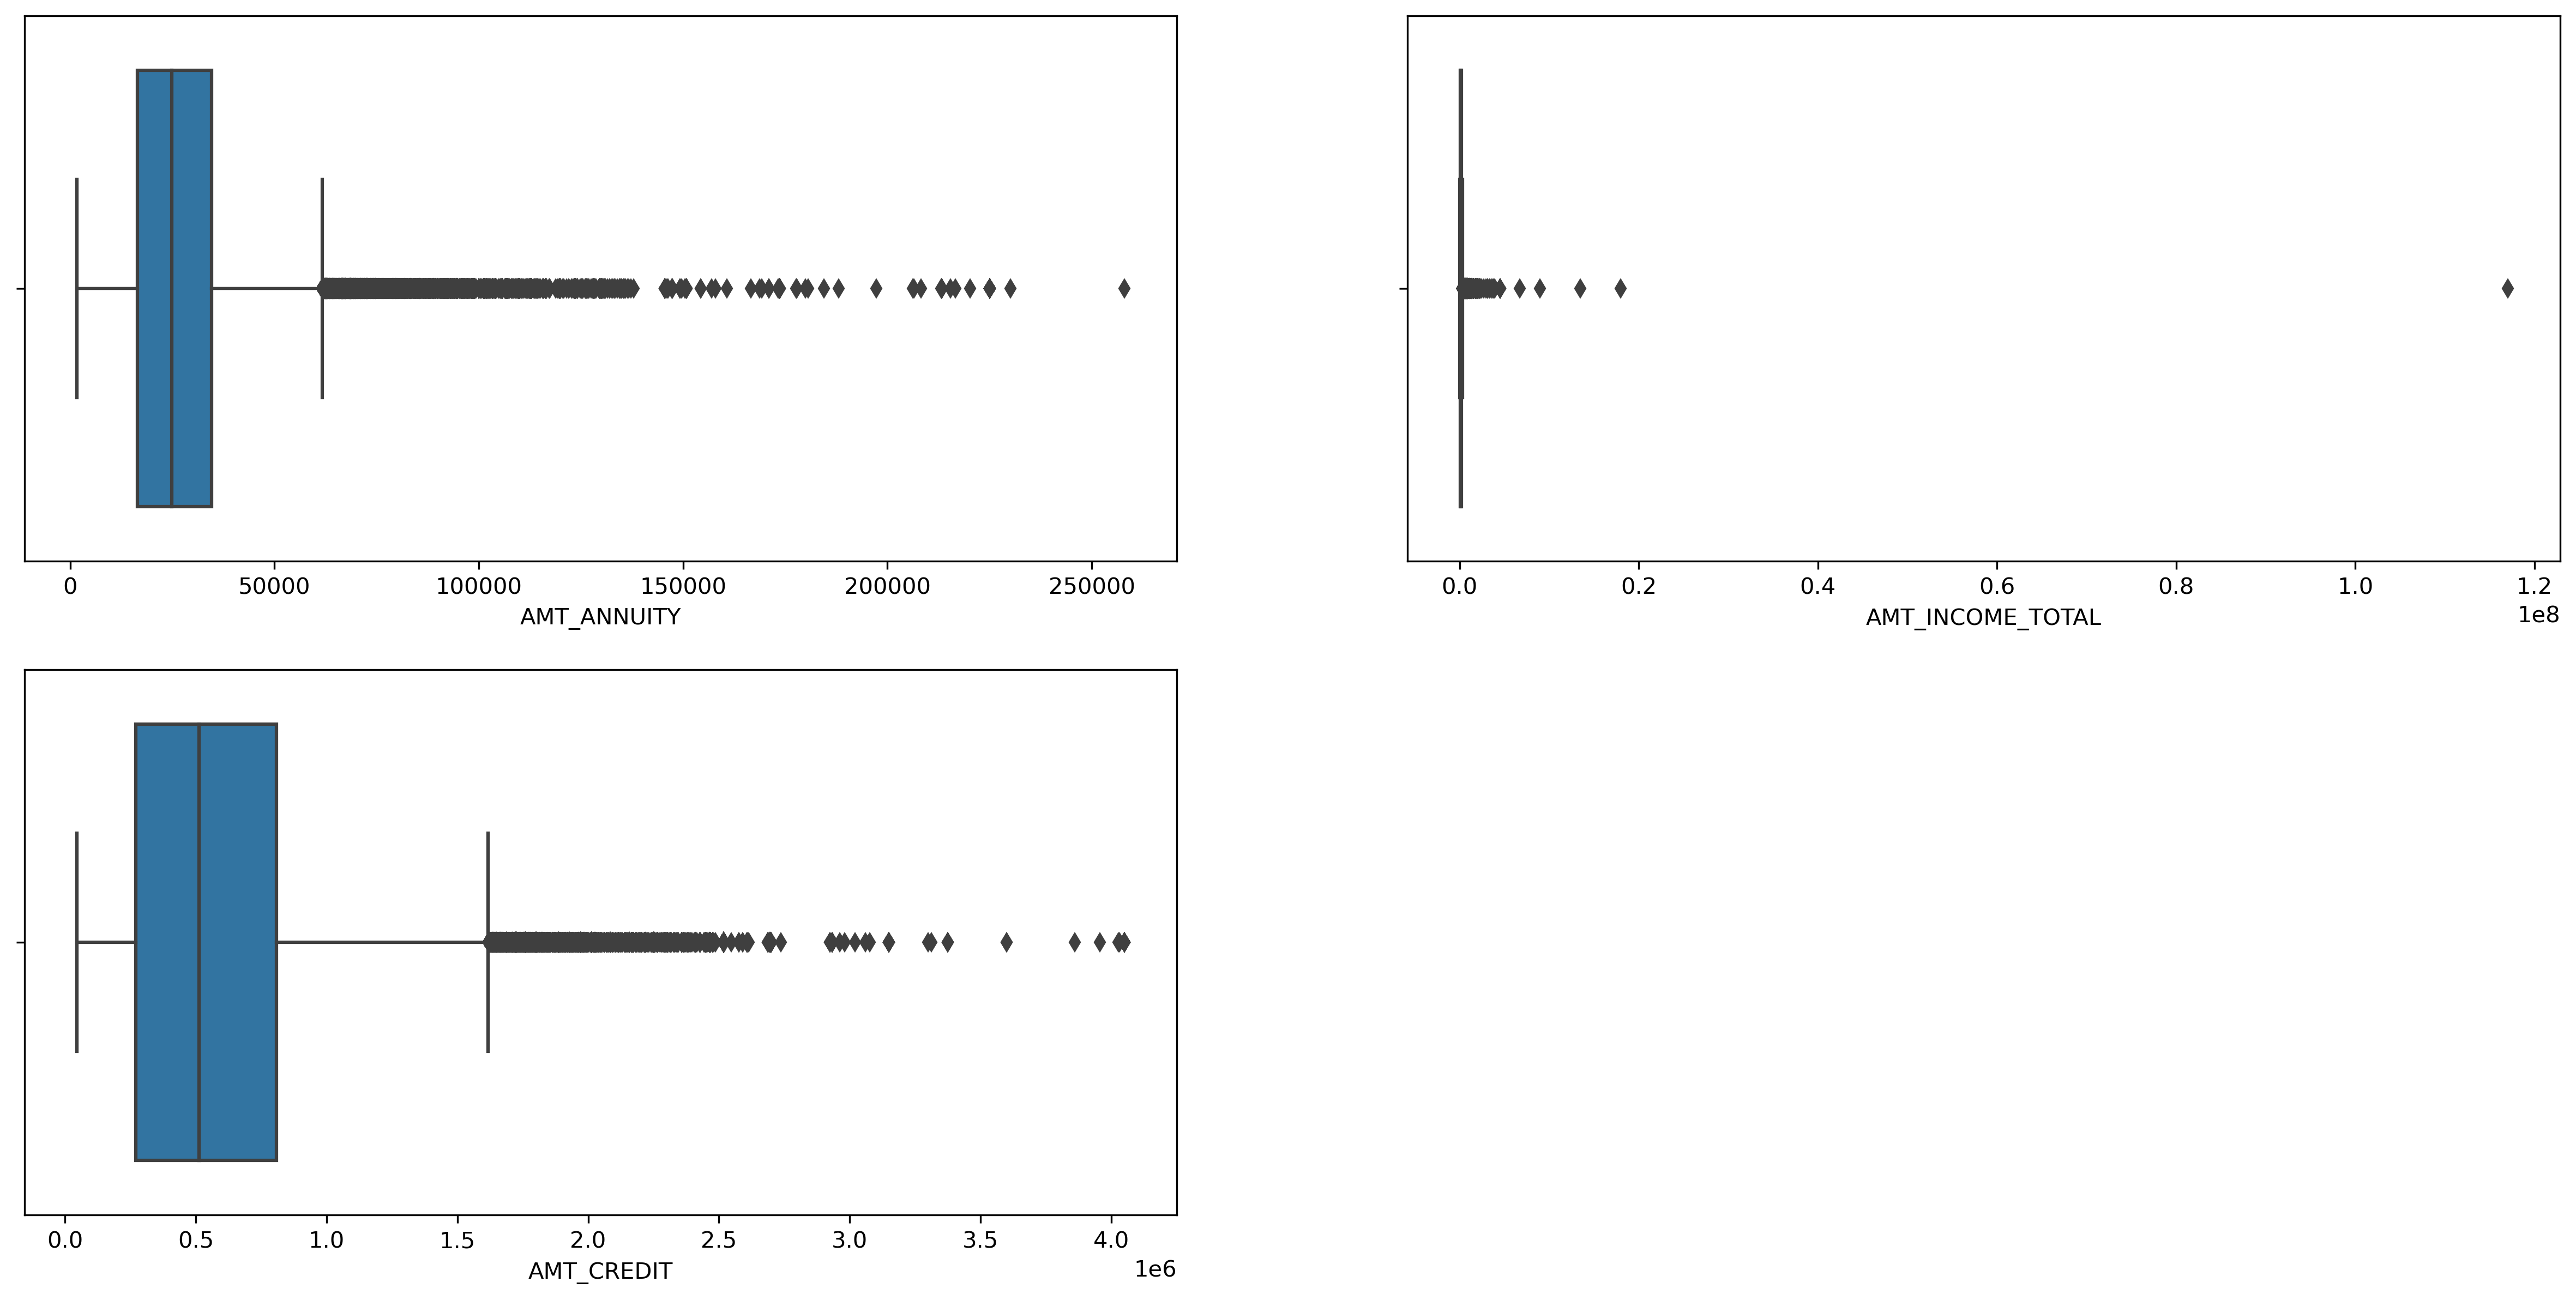

In [46]:
# Checking if there are any outliers
AmtCategories = ['AMT_ANNUITY','AMT_INCOME_TOTAL', 'AMT_CREDIT']
plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(AmtCategories):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df)
plt.show()

In [73]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,16036.995067,67724.742149,0.199368,...,2.052463,2.031521,0.502130,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,139443.751806,0.399526,...,0.509034,0.502737,0.211062,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,0.000000,...,1.000000,1.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,12413.000000,933.000000,0.000000,...,2.000000,2.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,15750.000000,2219.000000,0.000000,...,2.000000,2.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,19682.000000,5707.000000,0.000000,...,2.000000,2.000000,0.675053,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,1.000000,...,3.000000,3.000000,0.962693,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,25.000000


<div class="alert-danger"> There is single high value data point as outlier present in AMT_INCOME_TOTAL and Removal of this point will dtrasticaly impact the box plot for further analysis.The first quartiles is slim compare to third quartile for AMT_CREDIT,AMT_ANNUITY. This means that data are asymmetrical towards first quartile. Hence we will take data upto only 95th percentile.This will balance the data.

In [75]:
df=df[df['AMT_ANNUITY']<np.nanpercentile(df['AMT_ANNUITY'],95)]
df=df[df['AMT_INCOME_TOTAL']<np.nanpercentile(df['AMT_INCOME_TOTAL'],95)]
df=df[df['AMT_CREDIT']<np.nanpercentile(df['AMT_CREDIT'],95)]

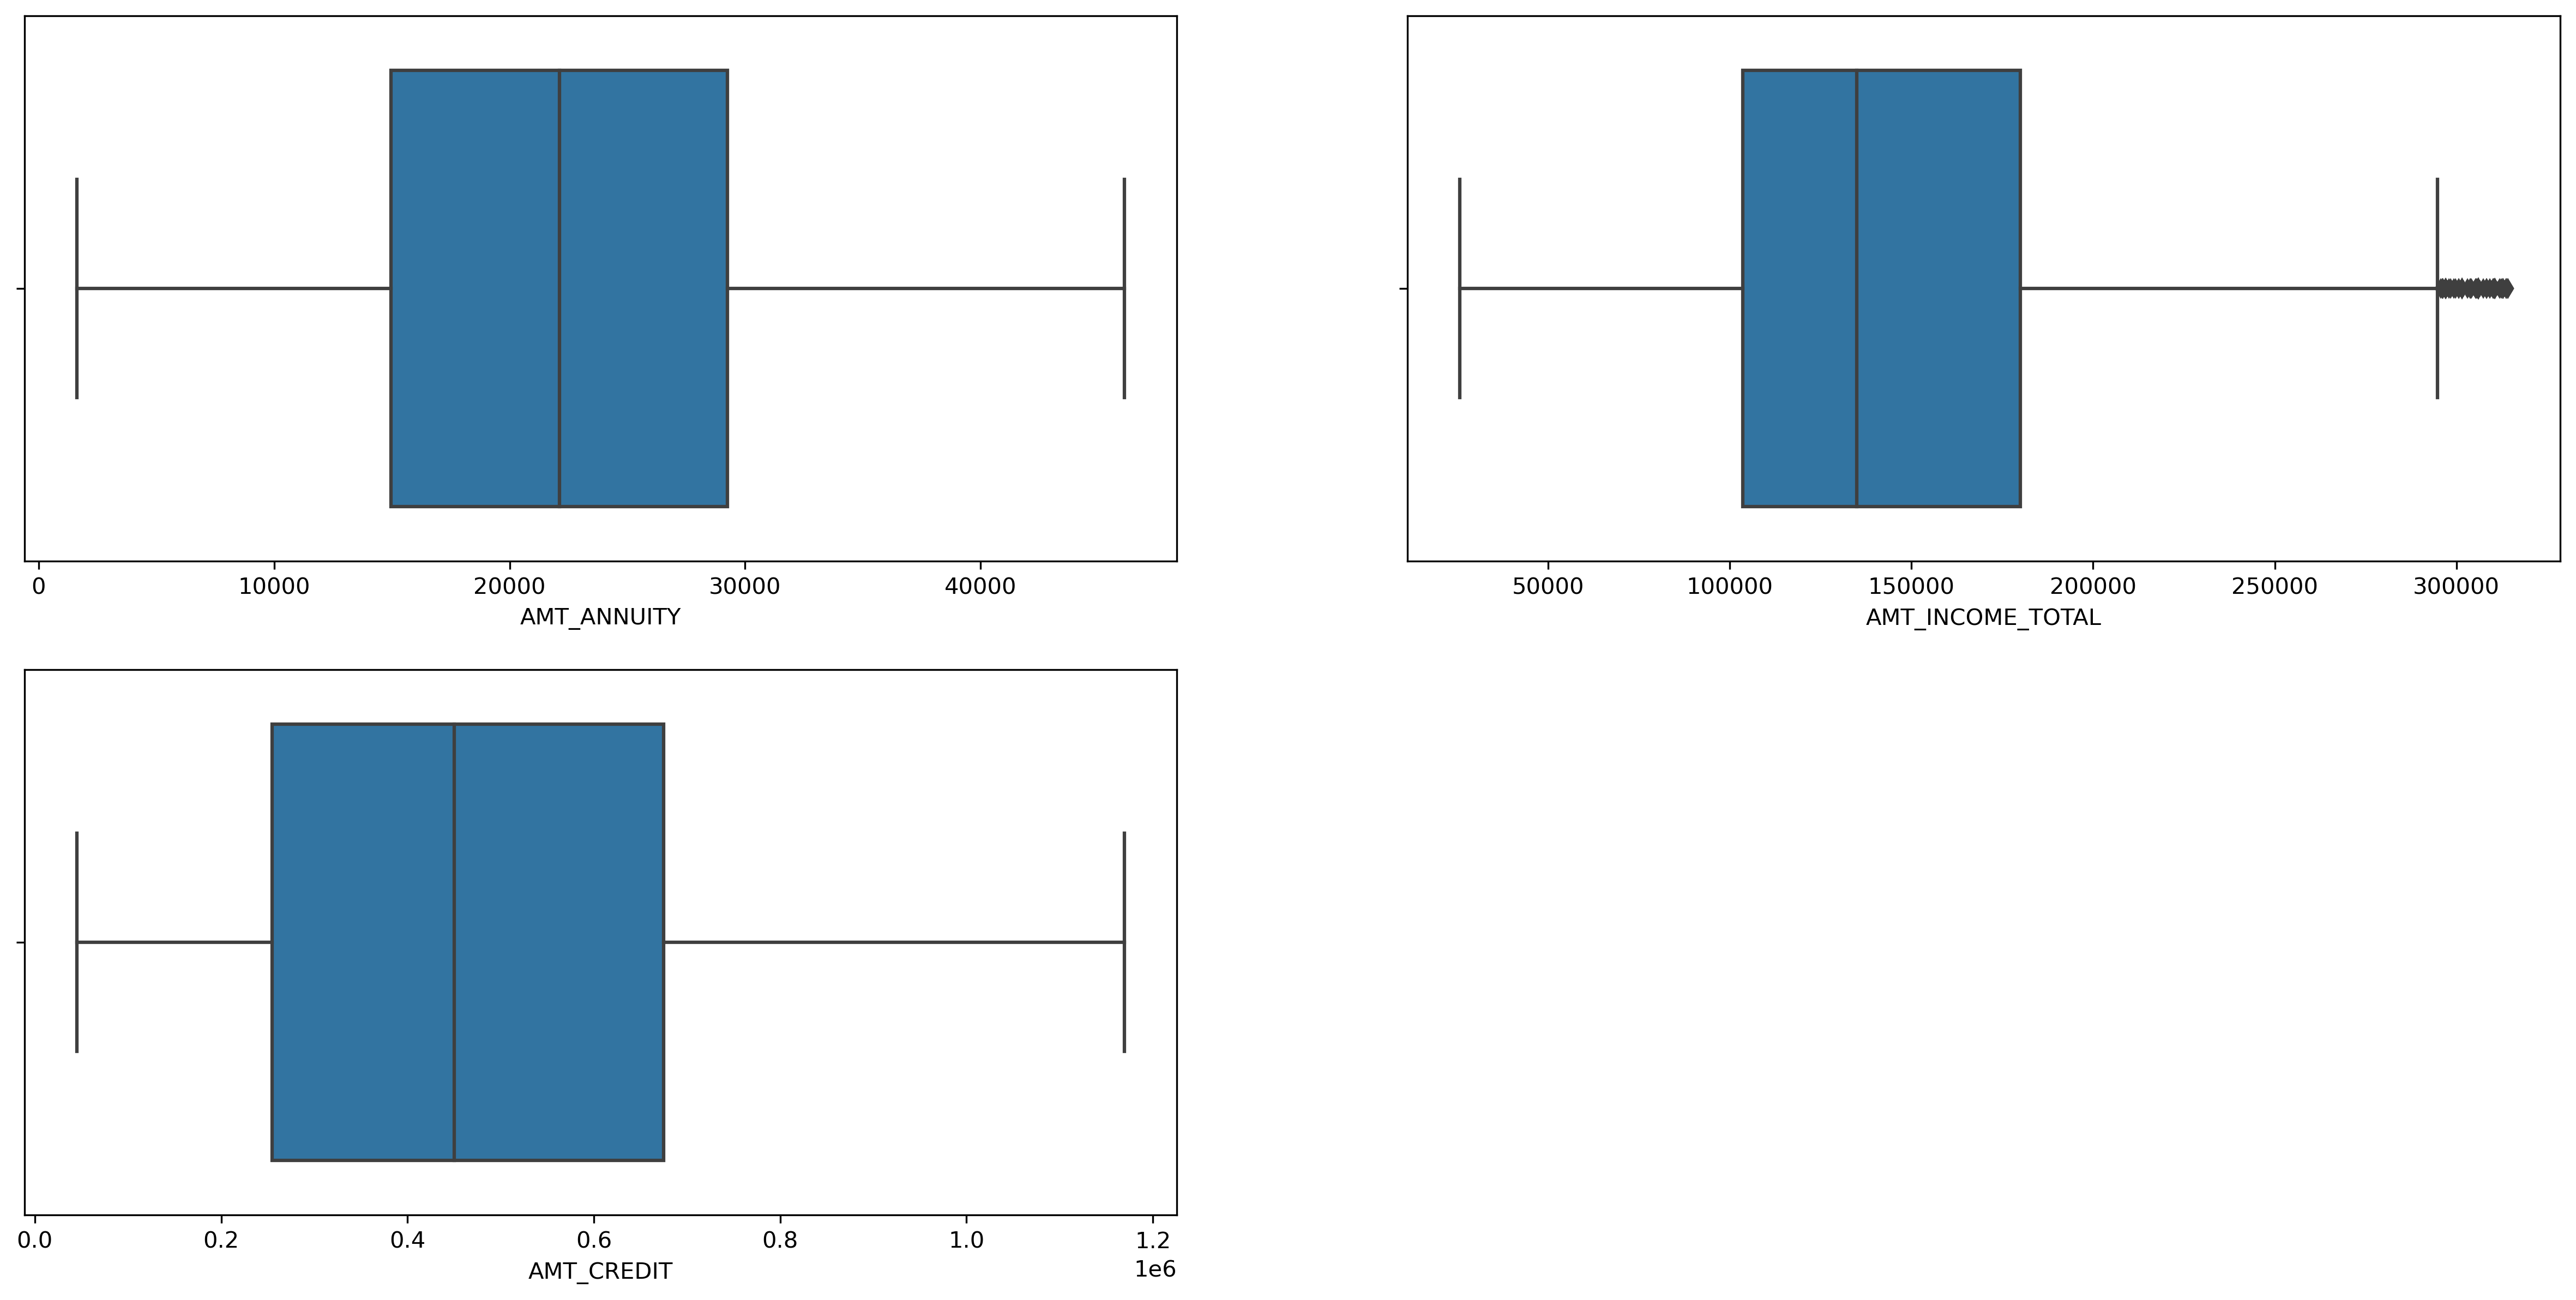

In [76]:
AmtCategories = ['AMT_ANNUITY','AMT_INCOME_TOTAL', 'AMT_CREDIT']
plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(AmtCategories):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df)
plt.show()

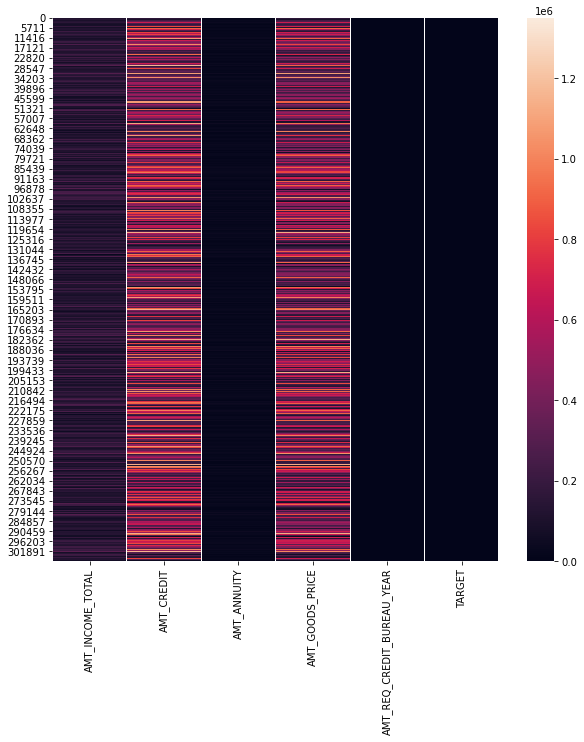

In [81]:
Amtdf=df[[i for i in df.columns if "AMT_" in i]]
Amtdf["TARGET"]=df["TARGET"]
sns.heatmap(Amtdf)
plt.show()

<div class="alert alert-info"> The Credit amount and AMT good Price have high correlation with the Target.

### Region Related Data
 <div class="alert-success"> REGION RATING CLIENT and REGION RATING CLIENT WITH CITY have high correlation.Rest columns can be removed.

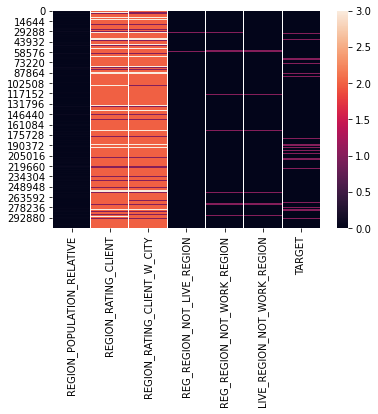

In [47]:
Regiondf=df[[i for i in df.columns if "REGION" in i]]
Regiondf["TARGET"]=df["TARGET"]
sns.heatmap(Regiondf)
plt.show()
# REGION RATING CLIENT and REGION RATING CLIENT WITH CITY have high correlation.
# rest columns can be removed.

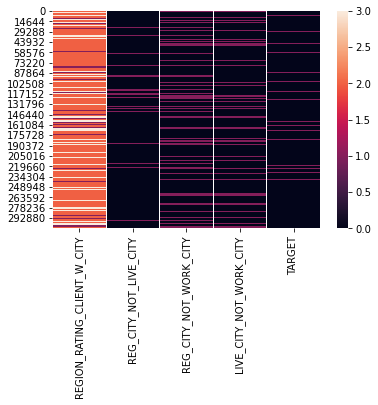

In [48]:
Regiondf1=df[[i for i in df.columns if "CITY" in i]]
Regiondf1["TARGET"]=df["TARGET"]
sns.heatmap(Regiondf1)
plt.show()

In [49]:
df.drop(['REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'], axis = 1,inplace=True)
df.drop(['LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis = 1,inplace=True)

### Personal Variables
Now we will be evaluating Variables such as age, employment status, relationship status,Education etc.
From below plots we can say 
<div class="alert-success">1) Normally the females are more likely to be NON Defaulters than men. <br>
<div class="alert-success">2) People whose income is from Working are the people more likely to be NON Defaulters.<br>
<div class="alert-success">3) People who has received Higher & Secondary education are less like to default.<br>
<div class="alert-success">4) Married people are less likely to default.<br>

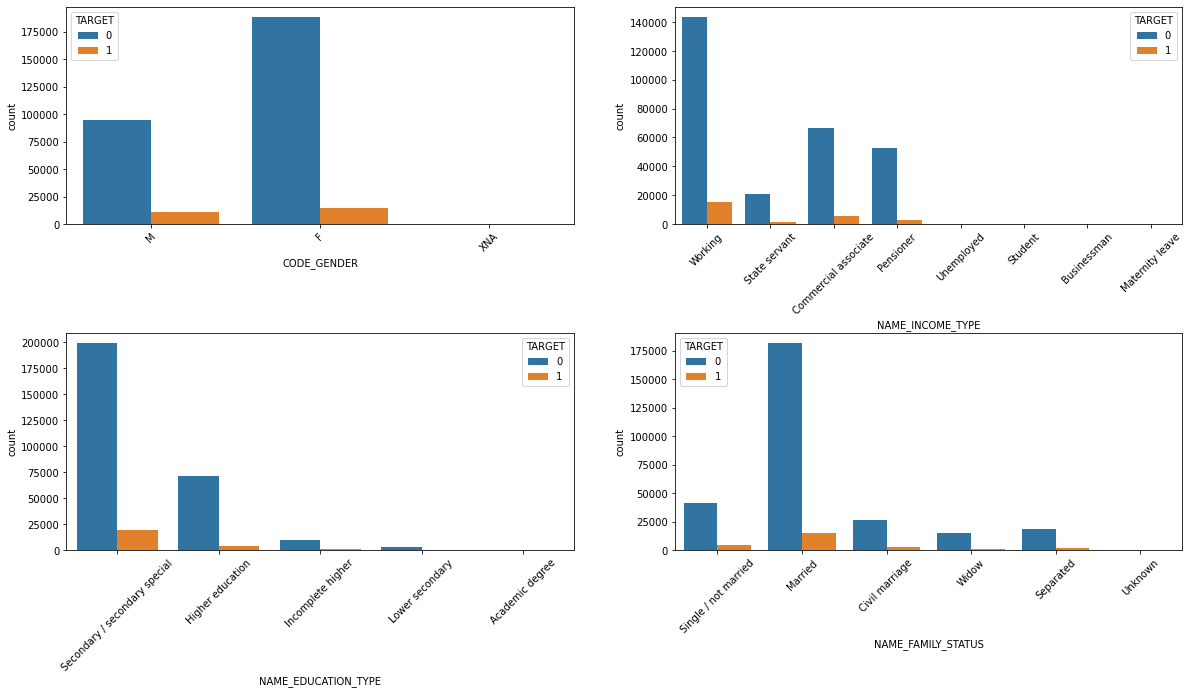

In [50]:
Categories = ['CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
plt.figure(figsize = (20, 10))

for i in enumerate(Categories):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)

### Job related Variables
We wanted to evaluate ORGANIZATION_TYPE & OCCUPATION TYPE however OCCUPATION TYPE had around 96391 missing values which is approx 31% of data.So we tried to find the mode value for OCCUPATION TYPE and imputed missing value with mode as this category might have some effect on TARGET variable.

    
<div class="alert-success">From below graph, we can say that labouers and Sales Staff ,core staff are less likley to default than others.Business entity type 3,XNA,Self employed are less likely to default then people working at other organizations.

In [52]:
print('OCCUPATION_TYPE: ',df['OCCUPATION_TYPE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

OCCUPATION_TYPE:  Laborers


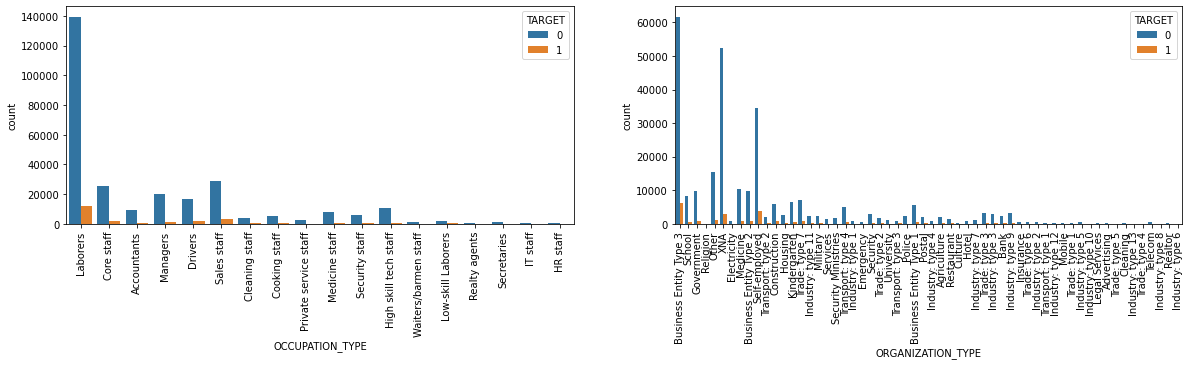

In [53]:
Jobrelated = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
plt.figure(figsize = (20, 10))

for i in enumerate(Jobrelated):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 90)

<div class="alert-danger"> From the data it clear  that DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,
doesnot have relevance to the defaulter or non defaulter decision and hence dropping those columns.

In [54]:
df.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'], axis = 1,inplace=True)

###  Age and Service Days.
Age of employee and no of days employed may have some impact on default or non default.Hence will evaluate those. I saw there are few negative values in the same,converting those to positive values.Also the age of people is in days which we need to convert it into years.

In [55]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['Age_in_years']=df.DAYS_BIRTH//(365)
df["Age_in_years"]

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: Age_in_years, Length: 307511, dtype: int64

<div class="alert-success"> We will do binning in age variable to have ease in data visualisation.After biniing when we plotted graph,it can be noted that people in age group 20-30  has Highest amount of Nondefaulters.

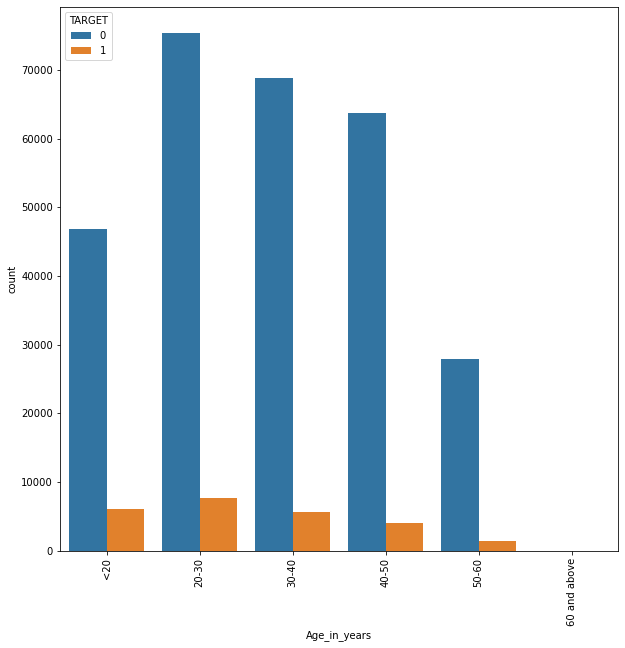

In [56]:
bins = [20,30,40,50,60,70,80]
slot = ['<20', '20-30','30-40','40-50','50-60', '60 and above']
df['Age_in_years']=pd.cut(df['Age_in_years'],bins,labels=slot)
plt.rcParams["figure.figsize"] = [10, 10]
sns.countplot(df['Age_in_years'],hue=df["TARGET"])
plt.xticks(rotation=90)
plt.show()

In [178]:
valuewise_defaulter_percentage(df,'DAYS_EMPLOYED')

# there is no perticular trend showing in Days employed for being defaulter.

,Value,Percentage of Defaulter
3202,13407.0,100.0
2057,9281.0,100.0
12039,12853.0,100.0
10922,8099.0,100.0
11038,11555.0,100.0
...,...,...
6725,3890.0,0.0
6723,10274.0,0.0
6722,8833.0,0.0
6719,9901.0,0.0


### Credit Bureau related data.
<div class="alert-danger"> From the graph below its clear that Credit Bureau related data is not showing any corelation with Target and hence dropping these coloumns. 

In [57]:
CreditBDf = df[[i for i in df.columns if "AMT_REQ_CREDIT"in i]]
CreditBDf.isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

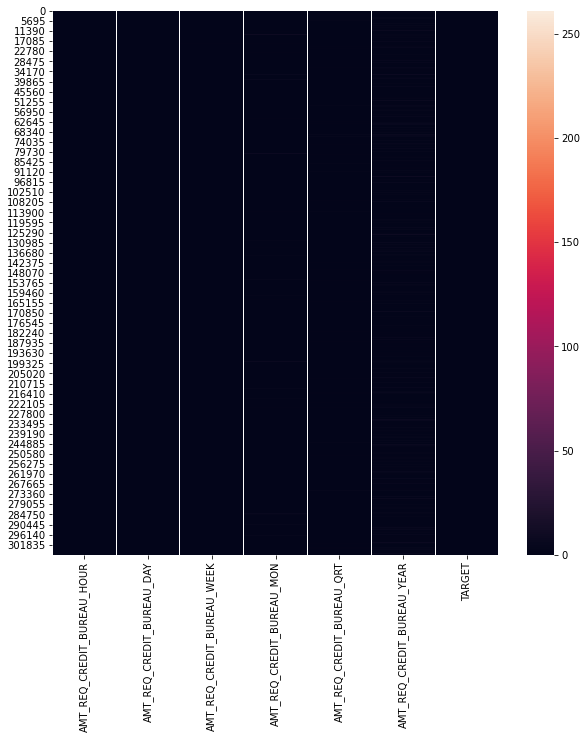

In [58]:
CreditBDf = df[[i for i in df.columns if "AMT_REQ_CREDIT"in i]]
fig=plt.subplots(figsize=(10,10))
CreditBDf["TARGET"]=df["TARGET"]
sns.heatmap(CreditBDf)
plt.show()

In [59]:
df.drop(df.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_QRT'].columns,axis=1,inplace=True)

### Family related.
    
<div class="alert-success"> As per below graphs,below column have have high correlation with target variable<br>
    1) People having no children,<br> 
    2) Unaccompanied people,<br>
    3) People having only 2 members in their family

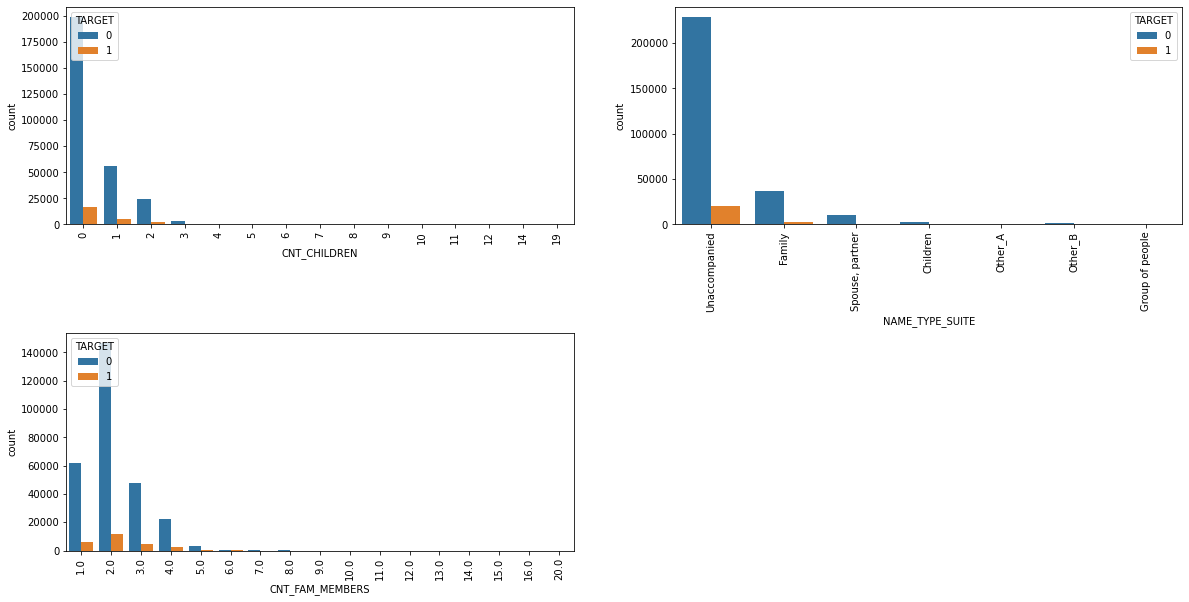

In [60]:
Familydf = ['CNT_CHILDREN', 'NAME_TYPE_SUITE','CNT_FAM_MEMBERS']
plt.figure(figsize = (20, 10))

for i in enumerate(Familydf):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df)
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 90)

### <div class="alert-warning"> Now that we have dropped all unwanted columns from dataframe and checked  one to one correlation of all columns  with target variable.We will find top correlation by segmenting the data frame w.r.t to the target variable and then will find the top 3 correlation for each of the segmented data and find if any insight is there. 

In [62]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,Age_in_years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,1.0,<20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,30-40
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,40-50
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,40-50
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,40-50


In [67]:
target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]
corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(5)

,Var1,Var2,Correlation
435,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
136,AMT_GOODS_PRICE,AMT_CREDIT,0.98
298,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
244,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
458,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


In [66]:
corr = target0_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(5)

,Var1,Var2,Correlation
435,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
136,AMT_GOODS_PRICE,AMT_CREDIT,0.99
298,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
244,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
458,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


 <div class="alert-warning"> As you can see from above calculation. Social Circle variables are having highest correlation.However if we know the exact meaning of them they we can draw more meaningful anaylsis. Second highest correlation is with Good price of Client and His credit history. Also region and city is showing high correlation. Also No of family members and No of Kids have high correlation. 

#  <div class="alert-info"> Now we will study other data file

In [146]:
prevdf= pd.read_csv("D:/C1- INTL/p_app_assignment.csv")

### Observing data and Handling Missing Value

In [147]:
PrevMissingvaluedf=prevdf.isna().mean().round(4) * 100
PrevMissingvaluedf50 = PrevMissingvaluedf[PrevMissingvaluedf>50]
print("Number of columns having null value more than 50% :", len(PrevMissingvaluedf50.index))
print(PrevMissingvaluedf50)

Number of columns having null value more than 50% : 4
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64


In [148]:
PrevMissingvaluedf=prevdf.isna().mean().round(4) * 100
PrevMissingvaluedfless50 = PrevMissingvaluedf[PrevMissingvaluedf<50]
print("Number of columns having null value less than 50% :", len(PrevMissingvaluedfless50.index))
PrevMissingvaluedfless50.sort_values(ascending=False).head(10)

Number of columns having null value less than 50% : 33


NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [149]:
#We will drop columns having missing value more than 50%
prevdf.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1,inplace=True)

In [150]:
#Also I feel the columns WEEKDAY_APPR_PROCESS_START ,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,
#NFLAG_LAST_APPL_IN_DAY doesnot have any relevance with target object hence they can be ignored
prevdf.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis = 1,inplace=True)

In [151]:
# Now we need to merge the apllication dataset (df) with previous application dataset (Prevdf) which will be merged on unique ID 
#which is 'SK_ID_CURR'. I tried merging both dataset entirely however 8 columns are repeat and some are irrelevant.ALso for 
#columns in Application dataset we have already seen the correlation.Hence merging only target variable with index.
jointdf=pd.merge(df[["SK_ID_CURR","TARGET"]],prevdf,how='left',on=["SK_ID_CURR"])

In [152]:
jointdf.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.165455e+06,1.165455e+06,1.153591e+06,901733.000000,1.153591e+06,1.153590e+06,8.923490e+05,1.153591e+06,1.153591e+06,901738.000000,695266.000000,695266.000000,695266.000000,695266.000000,695266.000000,695266.000000
mean,2.784798e+05,8.982415e-02,1.922814e+06,14547.667884,1.593308e+05,1.796937e+05,2.060077e+05,-8.711934e+02,3.010662e+02,15.971157,341998.314832,13533.980653,33473.608255,79866.258610,85442.852350,0.331906
std,1.027494e+05,2.859298e-01,5.324846e+05,12789.300752,2.629295e+05,2.884044e+05,2.824495e+05,7.814685e+02,6.639867e+03,14.467098,89294.743248,71732.486298,106426.159060,151907.927361,155500.705888,0.470898
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2870.000000,0.000000
25%,1.893620e+05,0.000000e+00,1.462152e+06,5972.805000,1.926000e+04,2.403000e+04,4.698000e+04,-1.296000e+03,-1.000000e+00,6.000000,365243.000000,-1616.000000,-1234.000000,-1303.000000,-1258.000000,0.000000
50%,2.790720e+05,0.000000e+00,1.922382e+06,10600.470000,6.750000e+04,7.565625e+04,1.022625e+05,-5.670000e+02,5.000000e+00,12.000000,365243.000000,-813.000000,-347.000000,-520.000000,-481.000000,0.000000
75%,3.673280e+05,0.000000e+00,2.384128e+06,18793.215000,1.755360e+05,1.951999e+05,2.250000e+05,-2.670000e+02,8.000000e+01,24.000000,365243.000000,-395.000000,145.000000,-57.000000,-27.000000,1.000000
max,4.562540e+05,1.000000e+00,2.845381e+06,418058.145000,4.455000e+06,4.104351e+06,4.455000e+06,-1.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

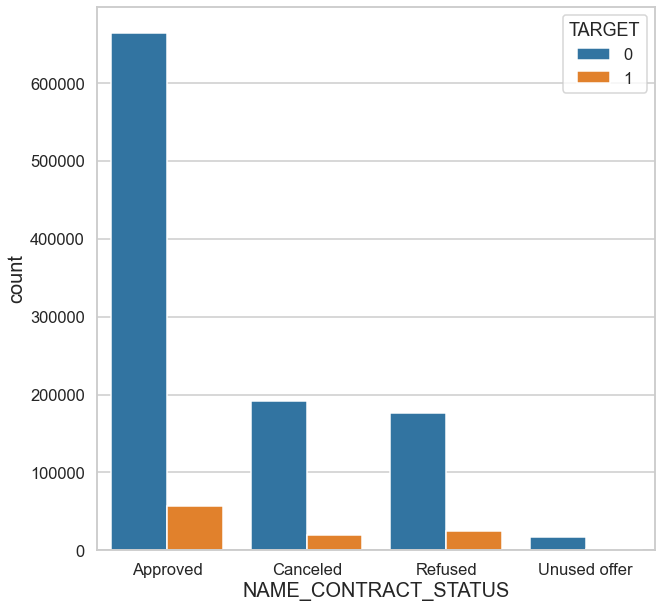

In [153]:
#Now we will check if the data is imbalanced.Most of the loans are approved.The data is higly imbalanced. 
sns.countplot(jointdf['NAME_CONTRACT_STATUS'],hue=jointdf['TARGET'])

In [154]:
# % of previously approved loan applicants that defaulted in current loan
Approved=jointdf[jointdf['NAME_CONTRACT_STATUS']=='Approved'].shape[0]
Defaultapproved=jointdf[(jointdf['TARGET']==1)& (jointdf['NAME_CONTRACT_STATUS']=='Approved')].shape[0]
print("% ofpreviously approved loan applicants that defaulted in current loan are :",(Defaultapproved*100/Approved))
print("% ofpreviously approved loan applicants that paid in current loan are :",100-(Defaultapproved*100/Approved))

% ofpreviously approved loan applicants that defaulted in current loan are : 7.882724962378092
% ofpreviously approved loan applicants that paid in current loan are : 92.11727503762191


In [155]:
# % of previously refused  loan applicants who were able to pay current loan
Refused=jointdf[jointdf['NAME_CONTRACT_STATUS']=='Refused'].shape[0]
EarlyRefusednowpay=jointdf[(jointdf['TARGET']==0)& (jointdf['NAME_CONTRACT_STATUS']=='Refused')].shape[0]
print("% ofpreviously Refused loan applicants that paid in current loan are :",(EarlyRefusednowpay*100/Refused))
print("% ofpreviously Refused loan applicants that defaulted in current loan are :",100-(EarlyRefusednowpay*100/Refused))

% ofpreviously Refused loan applicants that paid in current loan are : 87.54314620115056
% ofpreviously Refused loan applicants that defaulted in current loan are : 12.456853798849437


From the above calculations are graph we can draw below observations:-<br>
7%  of previously approved loan applicants that defaulted in current loan.<br>
92% of previously approved loan applicants that paid in current loan.<br>
88% of previously Refused loan applicants that paid in current loan.<br>
11.7% of previously Refused loan applicants that defaulted in current loan.

In [156]:
# We will set up 'SK_ID_CURR' as index.Here index has dtype as integer which can be misleading for calculation.Hence converting dtype to string
jointdf.set_index("SK_ID_CURR",inplace=True)
jointdf.index = jointdf.index.astype(str)

In [157]:
# now we will analyse the DAYS  data however saw the values in it are negative hence converting them to positive 
jointdf['DAYS_FIRST_DRAWING'] = jointdf['DAYS_FIRST_DRAWING'].abs()
jointdf['DAYS_FIRST_DUE'] = jointdf['DAYS_FIRST_DUE'].abs()
jointdf['DAYS_LAST_DUE_1ST_VERSION'] = jointdf['DAYS_LAST_DUE_1ST_VERSION'].abs()
jointdf['DAYS_LAST_DUE'] = jointdf['DAYS_LAST_DUE'].abs()
jointdf['DAYS_TERMINATION'] = jointdf['DAYS_TERMINATION'].abs()

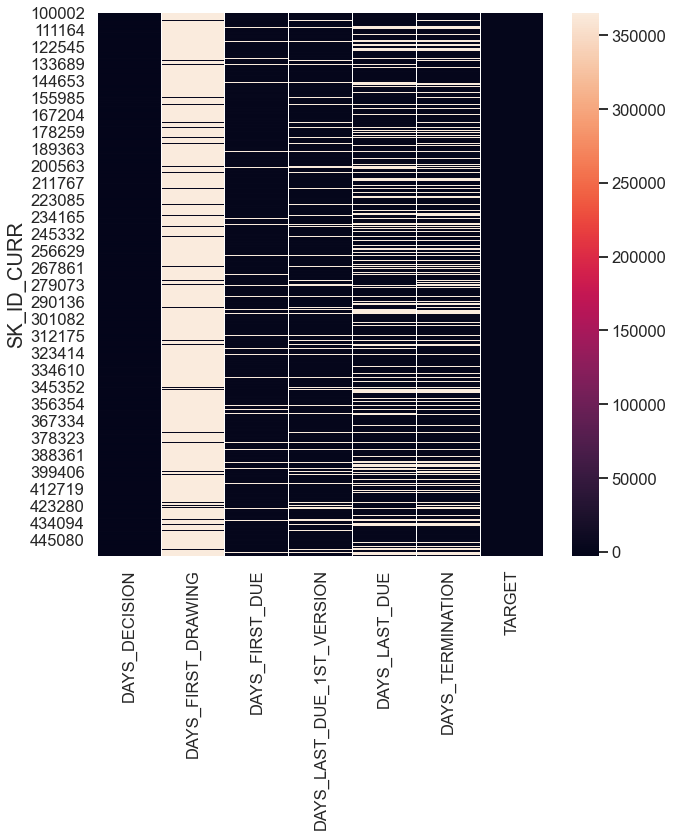

In [158]:
Daysdf=jointdf[[i for i in jointdf.columns if "DAYS_" in i]]
Daysdf["TARGET"]=jointdf["TARGET"]
sns.heatmap(Daysdf)
plt.show()
# it shows that DAYS_FIRST_DRAWING have high correlation with target variable. 

In [160]:
# as the be;pw columns doesnot seem to relevant with decision making we will drop
jointdf.drop(['DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION'], axis = 1,inplace=True)

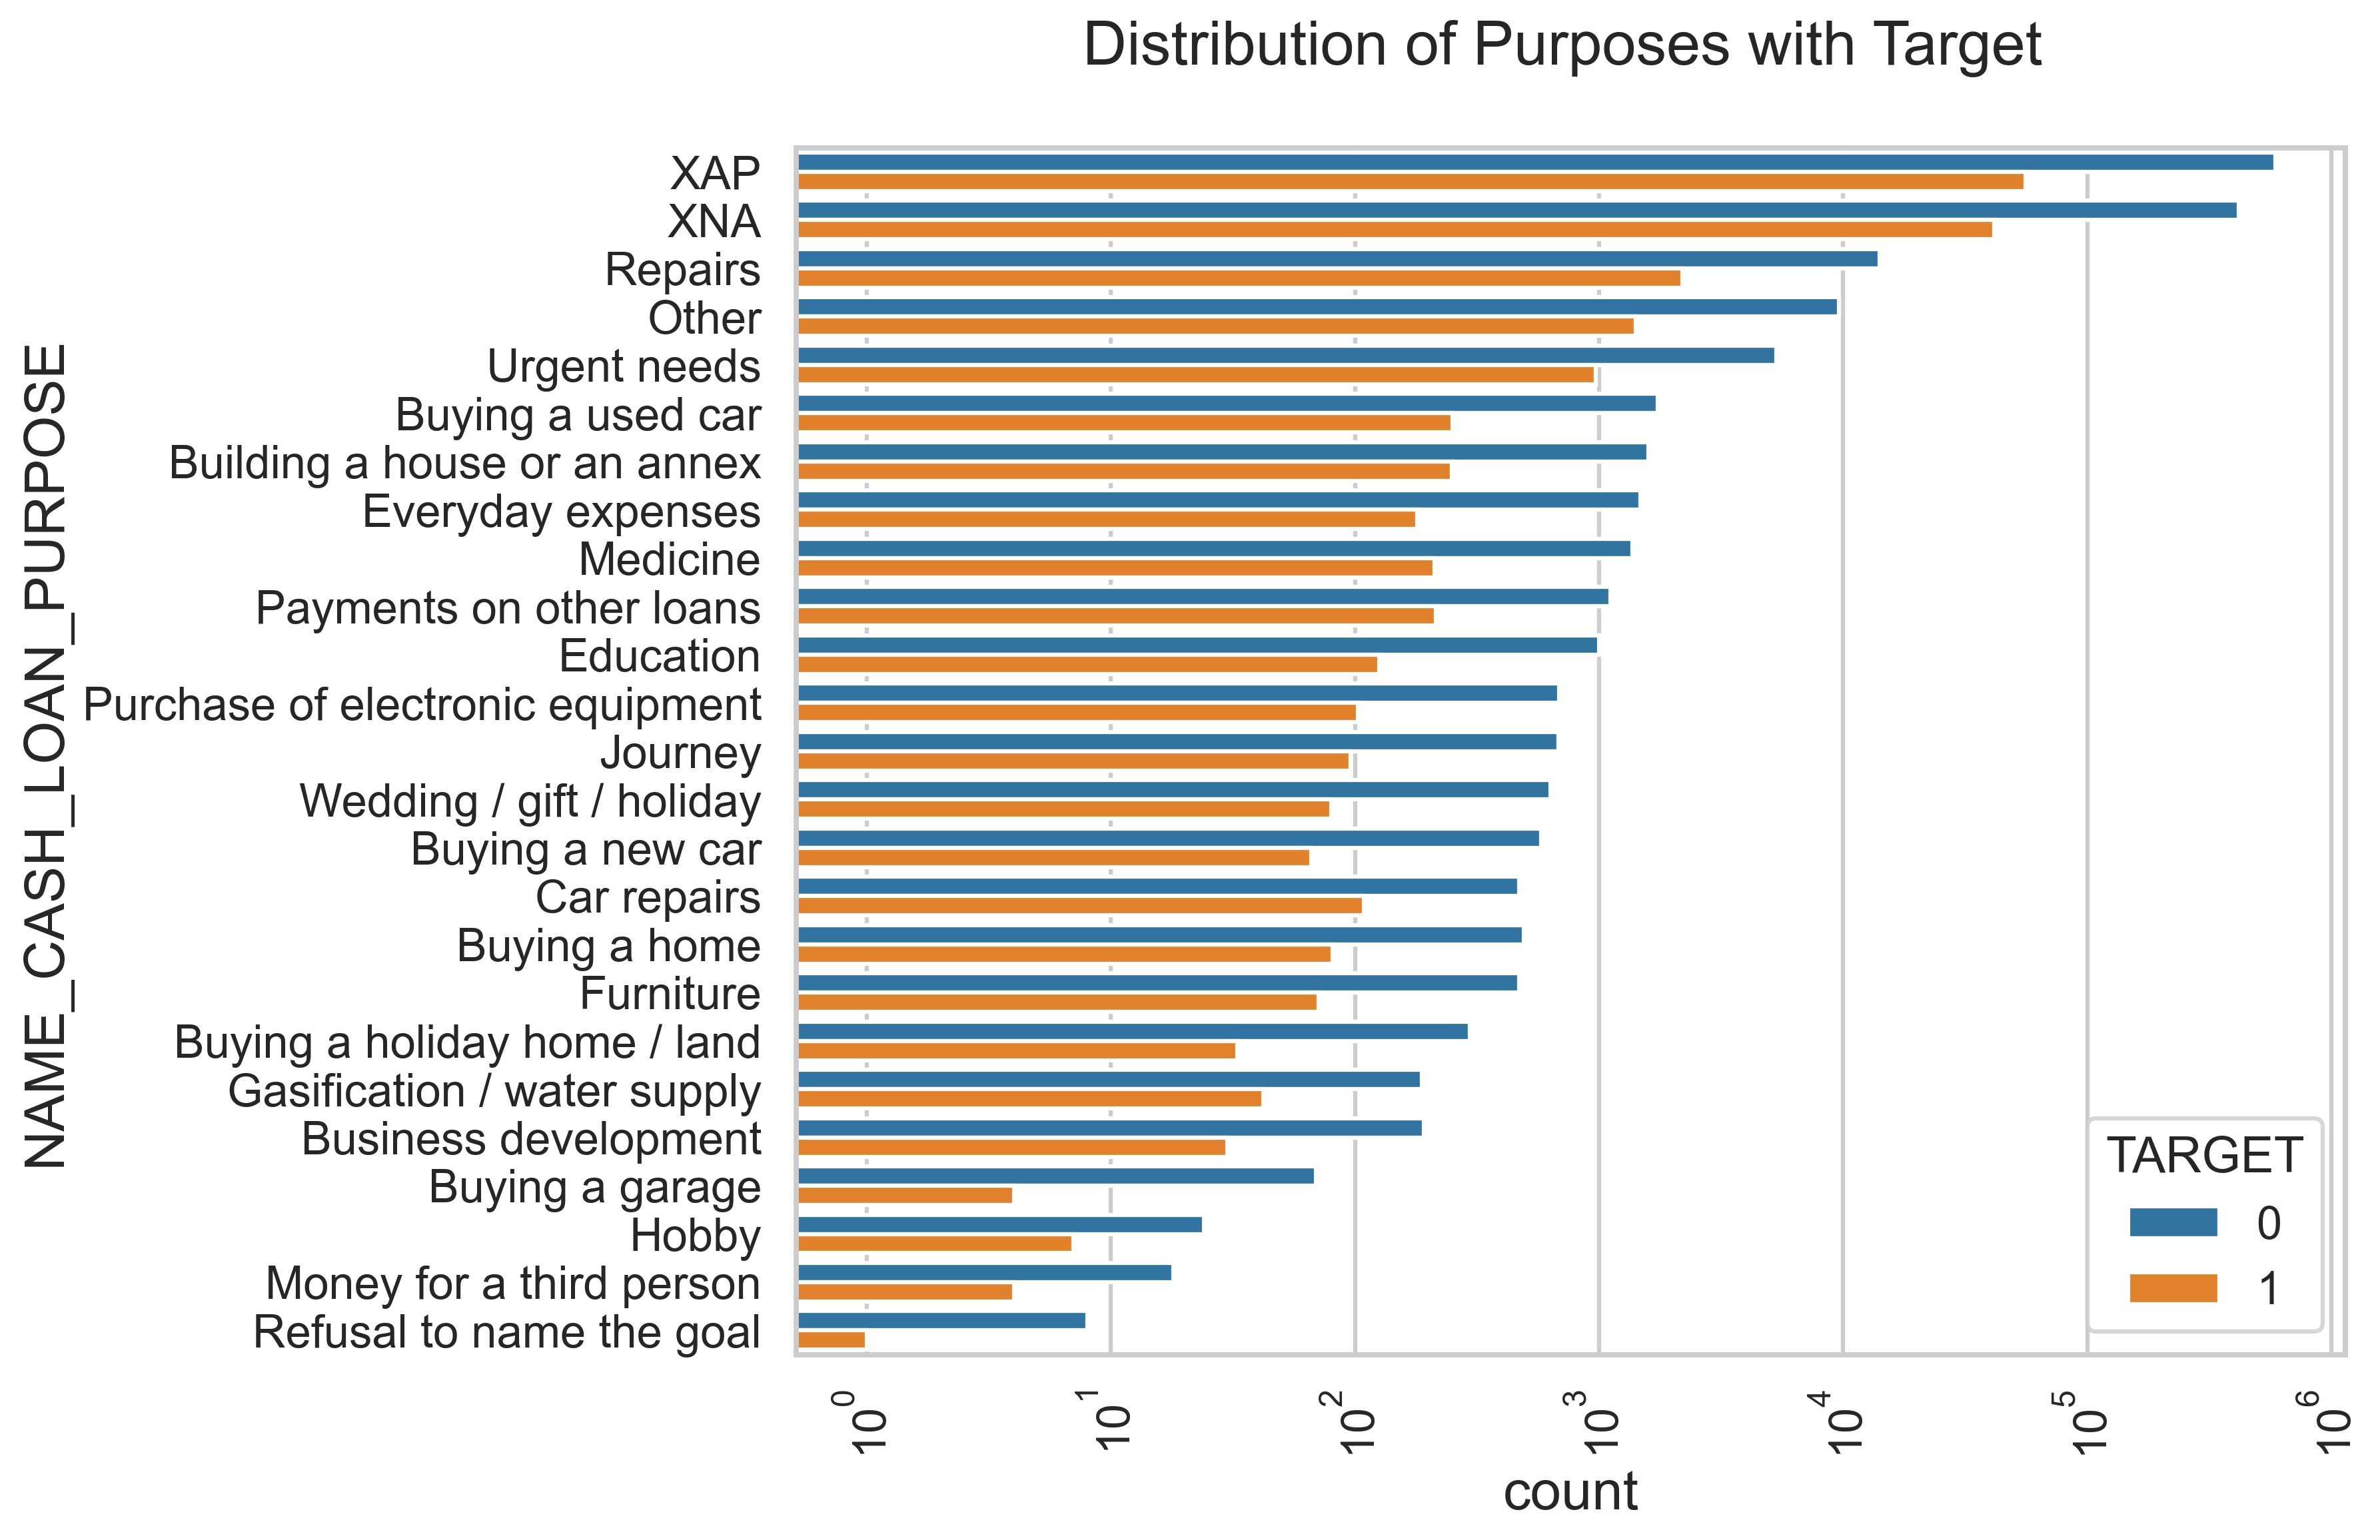

In [162]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,8),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Purposes with Target ')
ax = sns.countplot(data = jointdf, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=jointdf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

XAP XNA and repairs have highest loan rejections and approvals too

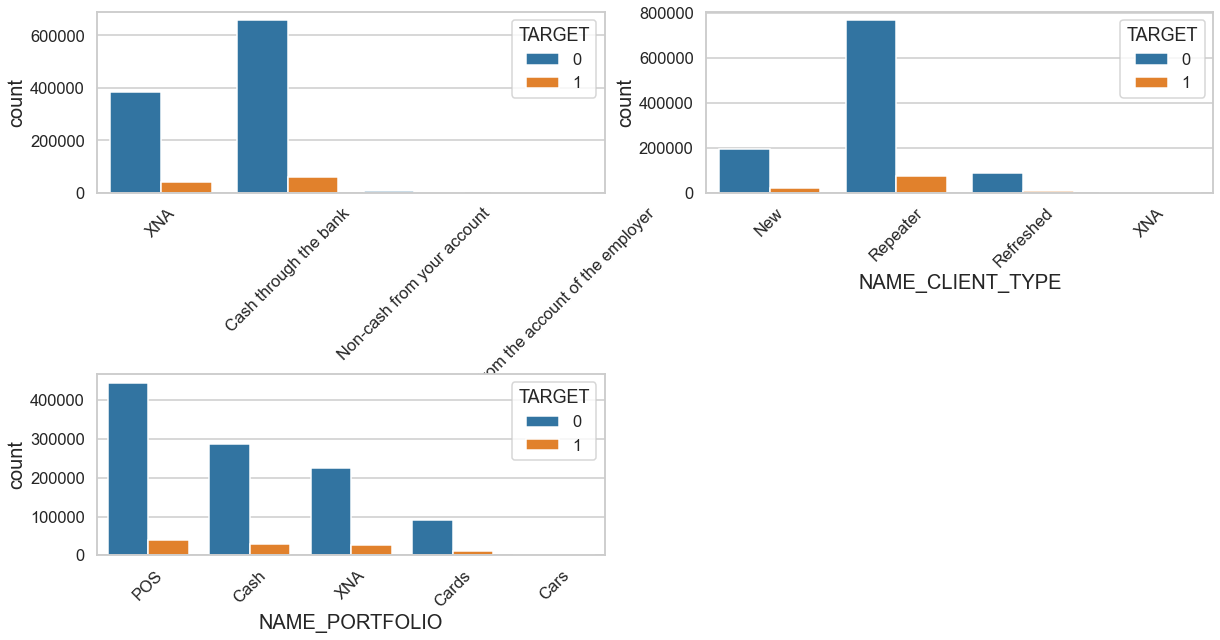

In [164]:
Categorical = ['NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']
plt.figure(figsize = (20, 10))

for i in enumerate(Categorical):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x = i[1], hue = 'TARGET', data = jointdf)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)

Payment mode Cash through bank has highest approval.For reperater applications we have high no of approval. For POS portfolio
we have highest no of approval.

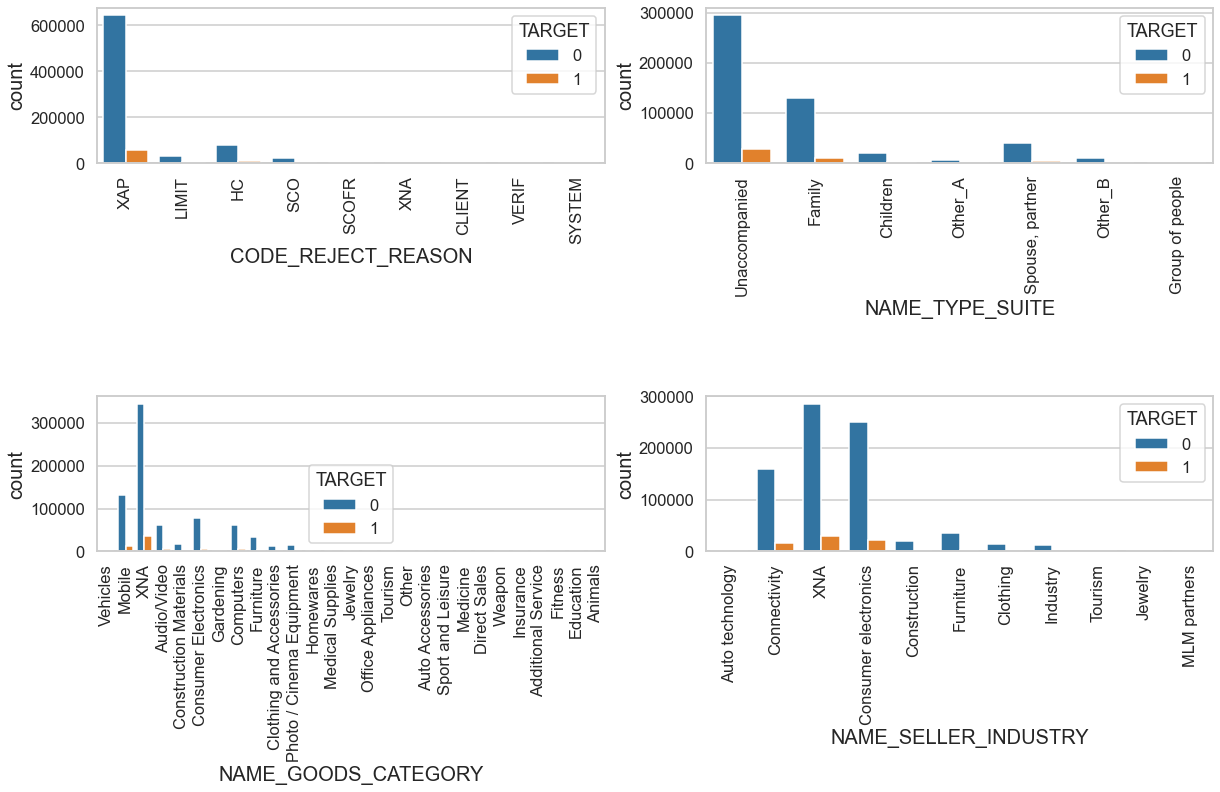

In [179]:
Categorical = ['CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY']
plt.figure(figsize = (20, 10))

for i in enumerate(Categorical):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=1.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = jointdf)
     
    plt.rcParams['axes.titlesize'] = 10
    plt.xticks(rotation = 90)

XAP code has highest Approval. XNA Seller industry type has Highest approvals.XNA goods category has highest approvals.
unaccompanied loan applicants have highest approvals.

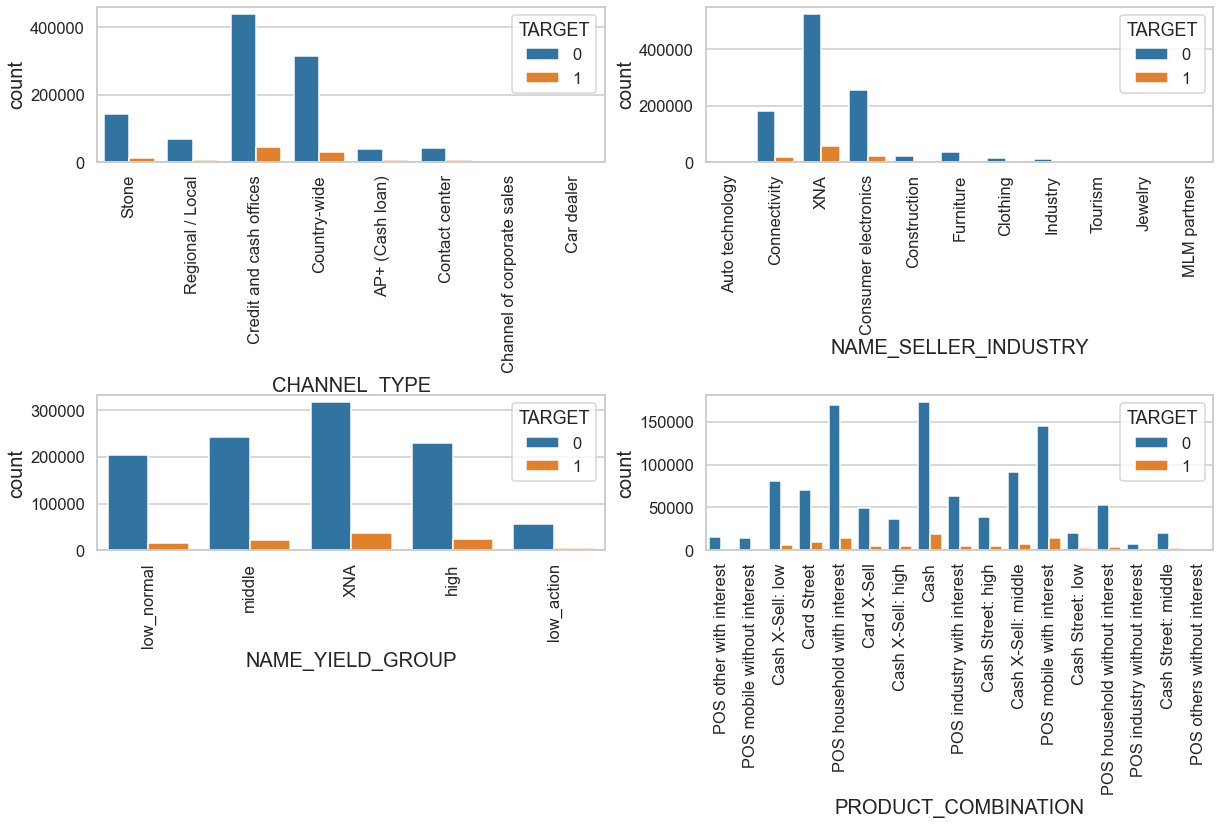

In [171]:
Categorical = ['CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
plt.figure(figsize = (20, 10))

for i in enumerate(Categorical):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=1.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = jointdf)
     
    plt.rcParams['axes.titlesize'] = 10
    plt.xticks(rotation = 90)

For Credit and Cash offices channel type there is highest no of approval.For XNA Seller industry there is highest no of approval.For XNA yeild group there is highest no of approval.For "POS household with interest" & "Cash" product combination there is highest no of approval.

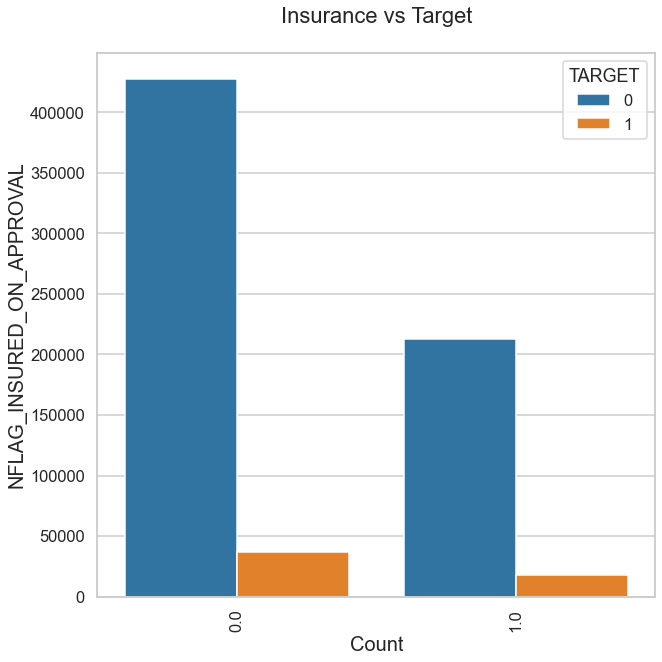

In [111]:
fig = plt.figure(5*5)
plt.title("Insurance vs Target")
sns.countplot(jointdf['NFLAG_INSURED_ON_APPROVAL'],hue=jointdf["TARGET"])
plt.xlabel("Count")
plt.xticks(rotation=90)
plt.ylabel("NFLAG_INSURED_ON_APPROVAL")
plt.show()
 
    # The rate of approval or deniel in people taking insurance or not taking insurance is looking similar.
    #However In both cases insured or non insurance Non defaulter percentage is more than Defaulter percentage.

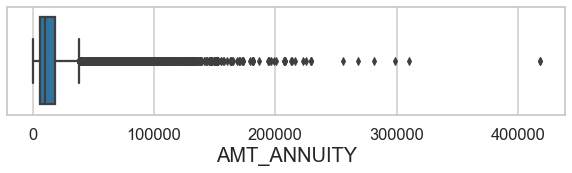

In [130]:
plt.figure(figsize=(10,2))
sns.boxplot(jointdf['AMT_ANNUITY'])
plt.show()

In [131]:
jointdf=jointdf[jointdf['AMT_ANNUITY']<np.nanpercentile(jointdf['AMT_ANNUITY'],95)]

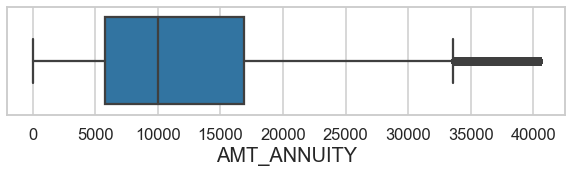

In [132]:
plt.figure(figsize=(10,2))
sns.boxplot(jointdf['AMT_ANNUITY'])
plt.show()

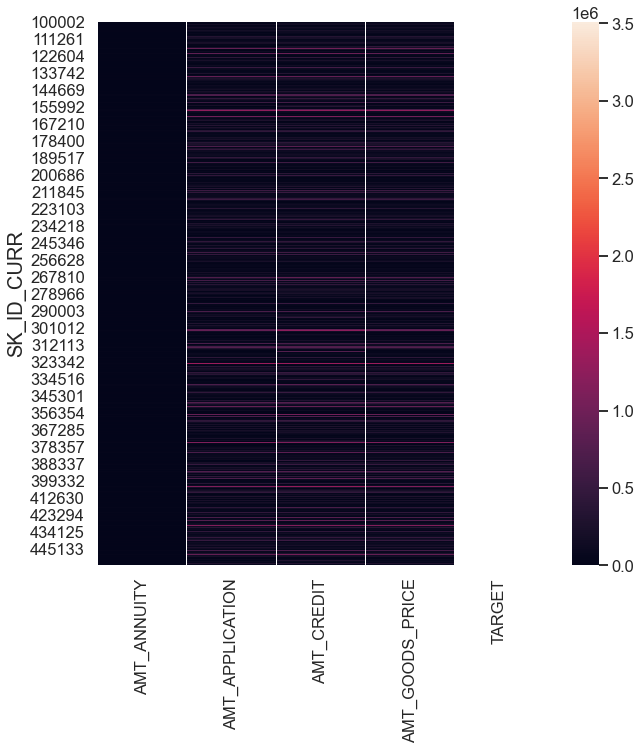

In [133]:
Amtdf=jointdf[[i for i in jointdf.columns if "AMT_" in i]]
Amtdf["TARGET"]=df["TARGET"]
sns.heatmap(Amtdf)
plt.show()

In [175]:
target0_df=jointdf.loc[jointdf["TARGET"]==0]
target1_df=jointdf.loc[jointdf["TARGET"]==1]
corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(5)

,Var1,Var2,Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
59,AMT_GOODS_PRICE,AMT_CREDIT,0.99
47,AMT_CREDIT,AMT_APPLICATION,0.95
46,AMT_CREDIT,AMT_ANNUITY,0.83
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.82


In [176]:
corr = target0_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(5)

,Var1,Var2,Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
59,AMT_GOODS_PRICE,AMT_CREDIT,0.99
47,AMT_CREDIT,AMT_APPLICATION,0.95
46,AMT_CREDIT,AMT_ANNUITY,0.80
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.79
